# __Understanding Consumer Perception of Dot & Key Moisturizers: A Comparative NLP-Driven Review Analysis__

> Using Flipkart reviews as a data source, this project investigates how customers perceive Four Dot & Key moisturizer cream variants. The analysis involves comprehensive NLP methods such as preprocessing, NER, sentiment analytics, TF-IDF, and LDA topic modelling. The findings compare each product’s performance based on sentiment, feature mentions, and thematic patterns, offering actionable insights for product improvement and customer satisfaction.

__Prepared by:__ Divya Bothra (MBA24077)

## __Web Scraping__

### 1. Dot & Key Vitamin C + E Sorbet Super Bright Moisturizer (Orange)

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

/opt/anaconda3/envs/bertopic_env/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [15]:
raw_url = "https://www.flipkart.com/philips-hp8100-60-hair-dryer/product-reviews/itmff6qnhzbshgwt?pid=HDRFF2VTK5ZWYV63&lid=LSTHDRFF2VTK5ZWYV63IDZNFY&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL"


target_reviews = 5000
sort_options = ["MOST_RECENT", "NEGATIVE_FIRST", "POSITIVE_FIRST", "MOST_HELPFUL"]
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [20]:
try:
    base_part = raw_url.split("?")[0]
    # Extract only the PID parameter (Product ID)
    params = raw_url.split("?")[1].split("&")
    pid_param = next(p for p in params if p.startswith("pid="))
    
    # Reconstruct the cleanest possible URL
    clean_url = f"{base_part}?{pid_param}"
    print(f"URL successfully cleaned to: {clean_url}")
except Exception as e:
    print("Warning: Could not clean URL automatically. Using raw URL (sorting might fail).")
    clean_url = raw_url

unique_reviews = {}

URL successfully cleaned to: https://www.flipkart.com/philips-hp8100-60-hair-dryer/product-reviews/itmff6qnhzbshgwt?pid=HDRFF2VTK5ZWYV63


In [16]:
for sort_by in sort_options:
    print(f"\n>>> Scraping by SORT MODE: {sort_by}")
    
    consecutive_duplicate_pages = 0
    
    # Loop pages 1 to 50 (Flipkart limit)
    for page_num in range(1, 51): 
        
        # Build URL: Clean Base + Sort + Page
        url = f"{clean_url}&sortOrder={sort_by}&page={page_num}"
        
        try:
            page = requests.get(url, headers=headers, timeout=10)
            soup = BeautifulSoup(page.content, 'html.parser')
        except:
            print("  - Connection Error. Retrying...")
            time.sleep(5)
            continue

        review_boxes = soup.find_all('div', class_="col x_CUu6 QccLnz")
        
        if not review_boxes:
            print(f"  - No reviews found on Page {page_num}. Ending {sort_by}.")
            break

        new_on_this_page = 0
        
        for box in review_boxes:
            try:
                # --- CLASS: RATING ---
                rating_div = box.find('div', class_="MKiFS6")
                rating = rating_div.text.strip() if rating_div else "N/A"

                # --- CLASS: REVIEW TEXT ---
                comment_div = box.find('div', class_="G4PxIA")
                # Clean up "READ MORE"
                full_text = comment_div.text.replace('READ MORE', '').strip() if comment_div else "N/A"

                # --- CLASS: NAME ---
                name_p = box.find('p', class_="zJ1ZGa") # Using the first part of "zJ1ZGa ZDi3w2" is safer
                name = name_p.text.strip() if name_p else "Guest"
                
                # --- UNIQUE ID ---
                # Create a fingerprint to avoid duplicates across different sort orders
                review_id = f"{name}-{full_text[:40]}"
                
                if review_id not in unique_reviews:
                    unique_reviews[review_id] = {
                        "Rating": rating,
                        "Review": full_text,
                        "Name": name,
                        "Source": sort_by
                    }
                    new_on_this_page += 1

            except Exception:
                continue

        print(f"  - Page {page_num}: Found {new_on_this_page} new reviews. (Total Unique: {len(unique_reviews)})")

        # Smart Stop: If we see 0 new reviews for 2 pages straight, move to next sort
        if new_on_this_page == 0:
            consecutive_duplicate_pages += 1
            if consecutive_duplicate_pages >= 2:
                print(f"  - Duplicates detected. Moving to next sort order.")
                break
        else:
            consecutive_duplicate_pages = 0 

        if len(unique_reviews) >= target_reviews:
            break
            
        time.sleep(random.uniform(1.75, 5))

    if len(unique_reviews) >= target_reviews:
        print("\nTarget Reached!")
        break


>>> Scraping by SORT MODE: MOST_RECENT
  - Page 1: Found 10 new reviews. (Total Unique: 10)
  - Page 2: Found 10 new reviews. (Total Unique: 20)
  - Page 3: Found 10 new reviews. (Total Unique: 30)
  - Page 4: Found 10 new reviews. (Total Unique: 40)
  - Page 5: Found 10 new reviews. (Total Unique: 50)
  - Page 6: Found 10 new reviews. (Total Unique: 60)
  - Page 7: Found 10 new reviews. (Total Unique: 70)
  - Page 8: Found 9 new reviews. (Total Unique: 79)
  - Page 9: Found 10 new reviews. (Total Unique: 89)
  - Page 10: Found 10 new reviews. (Total Unique: 99)
  - Page 11: Found 10 new reviews. (Total Unique: 109)
  - Page 12: Found 8 new reviews. (Total Unique: 117)
  - Page 13: Found 7 new reviews. (Total Unique: 124)
  - Page 14: Found 10 new reviews. (Total Unique: 134)
  - Page 15: Found 10 new reviews. (Total Unique: 144)
  - Page 16: Found 9 new reviews. (Total Unique: 153)
  - Page 17: Found 9 new reviews. (Total Unique: 162)
  - Page 18: Found 10 new reviews. (Total Unique:

In [41]:
#df = pd.DataFrame(list(unique_reviews.values()))
#df
#df.to_excel('orange.xlsx')

### 2. Dot & Key CICA Calming Skin Renewing Night Gel, For Oily, Acne Prone And Sensitive Skin (Green)

In [29]:
raw_url = "https://www.flipkart.com/dot-key-cica-calming-skin-renewing-night-gel-for-oily-acne-prone-sensitive/product-reviews/itm451eb895b2ac6?pid=MSCG794KYMTEXRUC&lid=LSTMSCG794KYMTEXRUCTANACQ&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL"


target_reviews = 5000
sort_options = ["MOST_RECENT", "NEGATIVE_FIRST", "POSITIVE_FIRST", "MOST_HELPFUL"]
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [31]:
try:
    base_part = raw_url.split("?")[0]
    # Extract only the PID parameter (Product ID)
    params = raw_url.split("?")[1].split("&")
    pid_param = next(p for p in params if p.startswith("pid="))
    
    # Reconstruct the cleanest possible URL
    clean_url = f"{base_part}?{pid_param}"
    print(f"URL successfully cleaned to: {clean_url}")
except Exception as e:
    print("Warning: Could not clean URL automatically. Using raw URL (sorting might fail).")
    clean_url = raw_url

unique_reviews = {}

URL successfully cleaned to: https://www.flipkart.com/dot-key-cica-calming-skin-renewing-night-gel-for-oily-acne-prone-sensitive/product-reviews/itm451eb895b2ac6?pid=MSCG794KYMTEXRUC


In [33]:
for sort_by in sort_options:
    print(f"\n>>> Scraping by SORT MODE: {sort_by}")
    
    consecutive_duplicate_pages = 0
    
    # Loop pages 1 to 90
    for page_num in range(1, 91): 
        
        # Build URL: Clean Base + Sort + Page
        url = f"{clean_url}&sortOrder={sort_by}&page={page_num}"
        
        try:
            page = requests.get(url, headers=headers, timeout=10)
            soup = BeautifulSoup(page.content, 'html.parser')
        except:
            print("  - Connection Error. Retrying...")
            time.sleep(5)
            continue

        review_boxes = soup.find_all('div', class_="col x_CUu6 QccLnz")
        
        if not review_boxes:
            print(f"  - No reviews found on Page {page_num}. Ending {sort_by}.")
            break

        new_on_this_page = 0
        
        for box in review_boxes:
            try:
                # --- CLASS: RATING ---
                rating_div = box.find('div', class_="MKiFS6")
                rating = rating_div.text.strip() if rating_div else "N/A"

                # --- CLASS: REVIEW TEXT ---
                comment_div = box.find('div', class_="G4PxIA")
                # Clean up "READ MORE"
                full_text = comment_div.text.replace('READ MORE', '').strip() if comment_div else "N/A"

                # --- CLASS: NAME ---
                name_p = box.find('p', class_="zJ1ZGa") # Using the first part of "zJ1ZGa ZDi3w2" is safer
                name = name_p.text.strip() if name_p else "Guest"
                
                # --- UNIQUE ID ---
                # Create a fingerprint to avoid duplicates across different sort orders
                review_id = f"{name}-{full_text[:40]}"
                
                if review_id not in unique_reviews:
                    unique_reviews[review_id] = {
                        "Rating": rating,
                        "Review": full_text,
                        "Name": name,
                    }
                    new_on_this_page += 1

            except Exception:
                continue

        print(f"  - Page {page_num}: Found {new_on_this_page} new reviews. (Total Unique: {len(unique_reviews)})")

        # Smart Stop: If we see 0 new reviews for 2 pages straight, move to next sort
        if new_on_this_page == 0:
            consecutive_duplicate_pages += 1
            if consecutive_duplicate_pages >= 2:
                print(f"  - Duplicates detected. Moving to next sort order.")
                break
        else:
            consecutive_duplicate_pages = 0 

        if len(unique_reviews) >= target_reviews:
            break
            
        time.sleep(random.uniform(2, 3.5))

    if len(unique_reviews) >= target_reviews:
        print("\nTarget Reached!")
        break


>>> Scraping by SORT MODE: MOST_RECENT
  - Page 1: Found 10 new reviews. (Total Unique: 10)
  - Page 2: Found 10 new reviews. (Total Unique: 20)
  - Page 3: Found 10 new reviews. (Total Unique: 30)
  - Page 4: Found 10 new reviews. (Total Unique: 40)
  - Page 5: Found 10 new reviews. (Total Unique: 50)
  - Page 6: Found 10 new reviews. (Total Unique: 60)
  - Page 7: Found 10 new reviews. (Total Unique: 70)
  - Page 8: Found 9 new reviews. (Total Unique: 79)
  - Page 9: Found 9 new reviews. (Total Unique: 88)
  - Page 10: Found 10 new reviews. (Total Unique: 98)
  - Page 11: Found 10 new reviews. (Total Unique: 108)
  - Page 12: Found 10 new reviews. (Total Unique: 118)
  - Page 13: Found 9 new reviews. (Total Unique: 127)
  - Page 14: Found 8 new reviews. (Total Unique: 135)
  - Page 15: Found 9 new reviews. (Total Unique: 144)
  - Page 16: Found 9 new reviews. (Total Unique: 153)
  - Page 17: Found 8 new reviews. (Total Unique: 161)
  - Page 18: Found 10 new reviews. (Total Unique: 1

In [39]:
df2 = pd.DataFrame(list(unique_reviews.values()))
df2.head()
df2.to_excel('green.xlsx')

### 3. Dot & Key 72hrs Hydrating Gel Moisturizer + Probiotics Face Moisturizer for dry skin (Blue)

In [80]:
raw_url = "https://www.flipkart.com/dot-key-72hrs-hydrating-gel-moisturizer-probiotics-face-dry-skin/product-reviews/itm3033572e3ce5a?pid=MSCFZR5BR7CKMYKZ&lid=LSTMSCFZR5BR7CKMYKZGNIUOR&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL"


target_reviews = 5000
sort_options = ["MOST_RECENT", "NEGATIVE_FIRST", "POSITIVE_FIRST", "MOST_HELPFUL"]
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [82]:
try:
    base_part = raw_url.split("?")[0]
    # Extract only the PID parameter (Product ID)
    params = raw_url.split("?")[1].split("&")
    pid_param = next(p for p in params if p.startswith("pid="))
    
    # Reconstruct the cleanest possible URL
    clean_url = f"{base_part}?{pid_param}"
    print(f"URL successfully cleaned to: {clean_url}")
except Exception as e:
    print("Warning: Could not clean URL automatically. Using raw URL (sorting might fail).")
    clean_url = raw_url

unique_reviews = {}

URL successfully cleaned to: https://www.flipkart.com/dot-key-72hrs-hydrating-gel-moisturizer-probiotics-face-dry-skin/product-reviews/itm3033572e3ce5a?pid=MSCFZR5BR7CKMYKZ


In [84]:
for sort_by in sort_options:
    print(f"\n>>> Scraping by SORT MODE: {sort_by}")
    
    consecutive_duplicate_pages = 0
    
    # Loop pages 1 to 150
    for page_num in range(1, 151): 
        
        # Build URL: Clean Base + Sort + Page
        url = f"{clean_url}&sortOrder={sort_by}&page={page_num}"
        
        try:
            page = requests.get(url, headers=headers, timeout=10)
            soup = BeautifulSoup(page.content, 'html.parser')
        except:
            print("  - Connection Error. Retrying...")
            time.sleep(5)
            continue

        review_boxes = soup.find_all('div', class_="col x_CUu6 QccLnz")
        
        if not review_boxes:
            print(f"  - No reviews found on Page {page_num}. Ending {sort_by}.")
            break

        new_on_this_page = 0
        
        for box in review_boxes:
            try:
                # --- CLASS: RATING ---
                rating_div = box.find('div', class_="MKiFS6")
                rating = rating_div.text.strip() if rating_div else "N/A"

                # --- CLASS: REVIEW TEXT ---
                comment_div = box.find('div', class_="G4PxIA")
                # Clean up "READ MORE"
                full_text = comment_div.text.replace('READ MORE', '').strip() if comment_div else "N/A"

                # --- CLASS: NAME ---
                name_p = box.find('p', class_="zJ1ZGa") # Using the first part of "zJ1ZGa ZDi3w2" is safer
                name = name_p.text.strip() if name_p else "Guest"
                
                # --- UNIQUE ID ---
                # Create a fingerprint to avoid duplicates across different sort orders
                review_id = f"{name}-{full_text[:40]}"
                
                if review_id not in unique_reviews:
                    unique_reviews[review_id] = {
                        "Rating": rating,
                        "Review": full_text,
                        "Name": name,
                    }
                    new_on_this_page += 1

            except Exception:
                continue

        print(f"  - Page {page_num}: Found {new_on_this_page} new reviews. (Total Unique: {len(unique_reviews)})")

        # Smart Stop: If we see 0 new reviews for 2 pages straight, move to next sort
        if new_on_this_page == 0:
            consecutive_duplicate_pages += 1
            if consecutive_duplicate_pages >= 2:
                print(f"  - Duplicates detected. Moving to next sort order.")
                break
        else:
            consecutive_duplicate_pages = 0 

        if len(unique_reviews) >= target_reviews:
            break
            
        time.sleep(random.uniform(2, 3.5))

    if len(unique_reviews) >= target_reviews:
        print("\nTarget Reached!")
        break


>>> Scraping by SORT MODE: MOST_RECENT
  - Page 1: Found 10 new reviews. (Total Unique: 10)
  - Page 2: Found 10 new reviews. (Total Unique: 20)
  - Page 3: Found 10 new reviews. (Total Unique: 30)
  - Page 4: Found 8 new reviews. (Total Unique: 38)
  - Page 5: Found 9 new reviews. (Total Unique: 47)
  - Page 6: Found 10 new reviews. (Total Unique: 57)
  - Page 7: Found 9 new reviews. (Total Unique: 66)
  - Page 8: Found 9 new reviews. (Total Unique: 75)
  - Page 9: Found 10 new reviews. (Total Unique: 85)
  - Page 10: Found 9 new reviews. (Total Unique: 94)
  - Page 11: Found 8 new reviews. (Total Unique: 102)
  - Page 12: Found 10 new reviews. (Total Unique: 112)
  - Page 13: Found 9 new reviews. (Total Unique: 121)
  - Page 14: Found 10 new reviews. (Total Unique: 131)
  - Page 15: Found 10 new reviews. (Total Unique: 141)
  - Page 16: Found 8 new reviews. (Total Unique: 149)
  - Page 17: Found 10 new reviews. (Total Unique: 159)
  - Page 18: Found 9 new reviews. (Total Unique: 168

In [86]:
df3 = pd.DataFrame(list(unique_reviews.values()))
df3.to_excel('blue.xlsx')
df3.head()

,Rating,Review,Name
0,2,Too small,Flipkart Customer
1,1,No improvement or any changes after using it,Joyeeta Choudhury
2,5,Very nice product 👍,nayi bhumika
3,5,Very nice 👍,Sanjay Choudhary
4,5,Product is good but the quantity is very small,Mahesh Micky


### 4. Dot & Key Retinol+Ceramide Night Repair Cream Moisturizer (Pink)

In [65]:
raw_url = "https://www.flipkart.com/dot-key-retinol-ceramide-night-repair-cream-with-hyaluronic-smooths-wrinkles-fine-lines/product-reviews/itm7febfe2659f77?pid=MSCFSH5FK7QTG2Y5&lid=LSTMSCFSH5FK7QTG2Y5C1R3RF&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL"


target_reviews = 5000
sort_options = ["MOST_RECENT", "NEGATIVE_FIRST", "POSITIVE_FIRST", "MOST_HELPFUL"]
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [67]:
try:
    base_part = raw_url.split("?")[0]
    # Extract only the PID parameter (Product ID)
    params = raw_url.split("?")[1].split("&")
    pid_param = next(p for p in params if p.startswith("pid="))
    
    # Reconstruct the cleanest possible URL
    clean_url = f"{base_part}?{pid_param}"
    print(f"URL successfully cleaned to: {clean_url}")
except Exception as e:
    print("Warning: Could not clean URL automatically. Using raw URL (sorting might fail).")
    clean_url = raw_url

unique_reviews = {}

URL successfully cleaned to: https://www.flipkart.com/dot-key-retinol-ceramide-night-repair-cream-with-hyaluronic-smooths-wrinkles-fine-lines/product-reviews/itm7febfe2659f77?pid=MSCFSH5FK7QTG2Y5


In [72]:
for sort_by in sort_options:
    print(f"\n>>> Scraping by SORT MODE: {sort_by}")
    
    consecutive_duplicate_pages = 0
    
    # Loop pages 1 to 150
    for page_num in range(1, 151): 
        
        # Build URL: Clean Base + Sort + Page
        url = f"{clean_url}&sortOrder={sort_by}&page={page_num}"
        
        try:
            page = requests.get(url, headers=headers, timeout=10)
            soup = BeautifulSoup(page.content, 'html.parser')
        except:
            print("  - Connection Error. Retrying...")
            time.sleep(5)
            continue

        review_boxes = soup.find_all('div', class_="col x_CUu6 QccLnz")
        
        if not review_boxes:
            print(f"  - No reviews found on Page {page_num}. Ending {sort_by}.")
            break

        new_on_this_page = 0
        
        for box in review_boxes:
            try:
                # --- CLASS: RATING ---
                rating_div = box.find('div', class_="MKiFS6")
                rating = rating_div.text.strip() if rating_div else "N/A"

                # --- CLASS: REVIEW TEXT ---
                comment_div = box.find('div', class_="G4PxIA")
                # Clean up "READ MORE"
                full_text = comment_div.text.replace('READ MORE', '').strip() if comment_div else "N/A"

                # --- CLASS: NAME ---
                name_p = box.find('p', class_="zJ1ZGa") # Using the first part of "zJ1ZGa ZDi3w2" is safer
                name = name_p.text.strip() if name_p else "Guest"
                
                # --- UNIQUE ID ---
                # Create a fingerprint to avoid duplicates across different sort orders
                review_id = f"{name}-{full_text[:40]}"
                
                if review_id not in unique_reviews:
                    unique_reviews[review_id] = {
                        "Rating": rating,
                        "Review": full_text,
                        "Name": name,
                    }
                    new_on_this_page += 1

            except Exception:
                continue

        print(f"  - Page {page_num}: Found {new_on_this_page} new reviews. (Total Unique: {len(unique_reviews)})")

        # Smart Stop: If we see 0 new reviews for 2 pages straight, move to next sort
        if new_on_this_page == 0:
            consecutive_duplicate_pages += 1
            if consecutive_duplicate_pages >= 2:
                print(f"  - Duplicates detected. Moving to next sort order.")
                break
        else:
            consecutive_duplicate_pages = 0 

        if len(unique_reviews) >= target_reviews:
            break
            
        time.sleep(random.uniform(2, 3.5))

    if len(unique_reviews) >= target_reviews:
        print("\nTarget Reached!")
        break


>>> Scraping by SORT MODE: MOST_RECENT
  - Page 1: Found 0 new reviews. (Total Unique: 405)
  - Page 2: Found 0 new reviews. (Total Unique: 405)
  - Duplicates detected. Moving to next sort order.

>>> Scraping by SORT MODE: NEGATIVE_FIRST
  - Page 1: Found 0 new reviews. (Total Unique: 405)
  - Page 2: Found 0 new reviews. (Total Unique: 405)
  - Duplicates detected. Moving to next sort order.

>>> Scraping by SORT MODE: POSITIVE_FIRST
  - Page 1: Found 0 new reviews. (Total Unique: 405)
  - Page 2: Found 0 new reviews. (Total Unique: 405)
  - Duplicates detected. Moving to next sort order.

>>> Scraping by SORT MODE: MOST_HELPFUL
  - Page 1: Found 0 new reviews. (Total Unique: 405)
  - Page 2: Found 0 new reviews. (Total Unique: 405)
  - Duplicates detected. Moving to next sort order.


In [78]:
df4 = pd.DataFrame(list(unique_reviews.values()))
df4.to_excel('pink.xlsx')
df4.head()

,Rating,Review,Name
0,5,Good product,Shifa
1,5,Good for dry and sensitive skin. Fast absorbin...,Priya Banerjee
2,4,Good,hasen ali
3,5,I'm so happy,Mrittika Roy
4,5,Very light cream 👍🏻👍🏻,Prins Soni


## __Analysis__

### Analysis 01: Preprocessing

In [113]:
import pandas as pd
df = pd.read_excel('SMA_Dataset.xlsx')
df

,Moisturizer,Rating,Review,Name
0,Orange,4,NaN,Guest
1,Orange,5,This product is really good I have combination...,Komal Sen
2,Orange,5,Very nice product,Flipkart Customer
3,Orange,5,Too good 👍,Meenakshi Thapan
4,Orange,5,Good 👍,Zeba Ahmad
...,...,...,...,...
3590,Pink,2,This product is not suited to me. Whenever I a...,Flipkart Customer
3591,Pink,3,Good,Mishu Chakraborty
3592,Pink,3,Very less quantity,Vidyasri Bethapudi
3593,Pink,3,It's not suitable for my sensitive skin,Flipkart Customer


In [115]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [117]:
# Preprocessing Function

import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove numbers & punctuation
    doc = nlp(text)

    tokens = []
    for token in doc:
        if token.lemma_ not in STOP_WORDS and len(token.lemma_) > 2:
            tokens.append(token.lemma_)
    
    return " ".join(tokens)

In [125]:
# Apply Preprocessing to Entire Dataset
df['clean_text'] = df['Review'].apply(preprocess_text)
df.head()

,Moisturizer,Rating,Review,Name,clean_text
0,Orange,4,NaN,Guest,
1,Orange,5,This product is really good I have combination...,Komal Sen,product good combination skin good effect wint...
2,Orange,5,Very nice product,Flipkart Customer,nice product
3,Orange,5,Too good 👍,Meenakshi Thapan,good
4,Orange,5,Good 👍,Zeba Ahmad,good


In [133]:
#Create Separate DataFrames for Each Moisturizer

variants = df['Moisturizer'].unique()

variant_dfs = {}
for v in variants:
    variant_dfs[v] = df[df['Moisturizer'] == v]

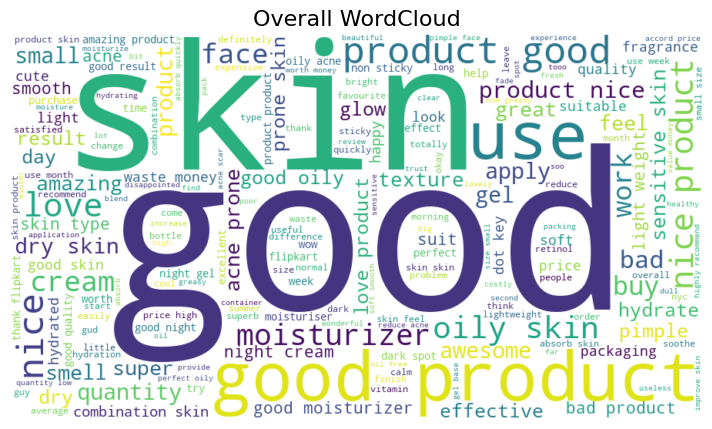

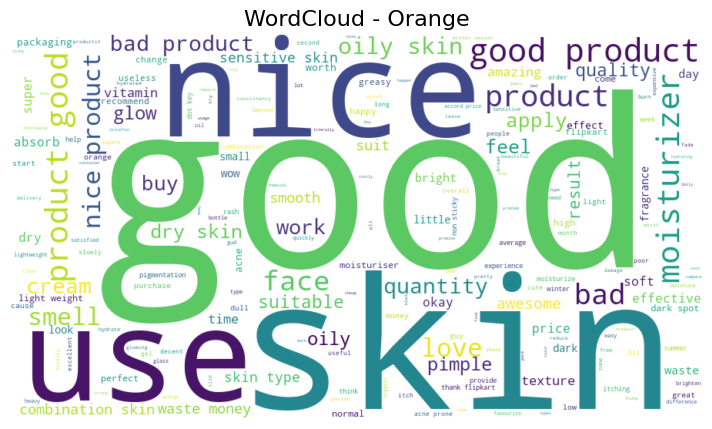

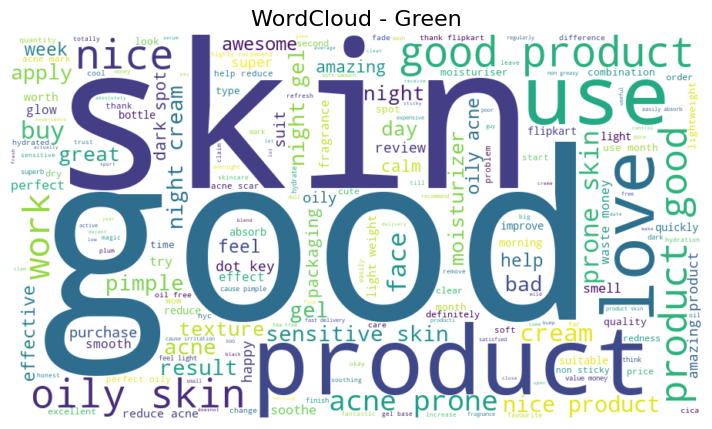

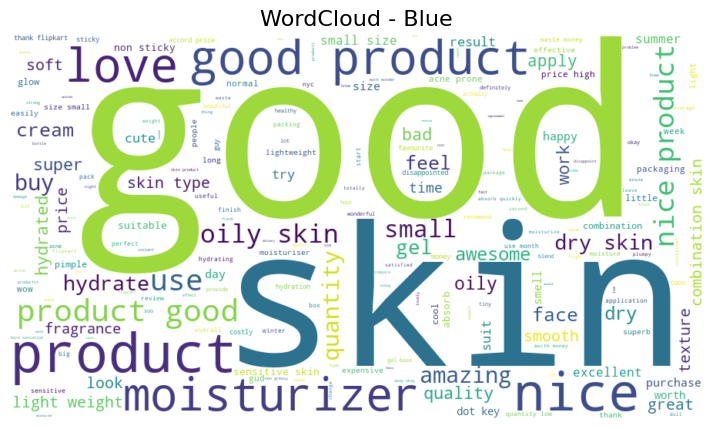

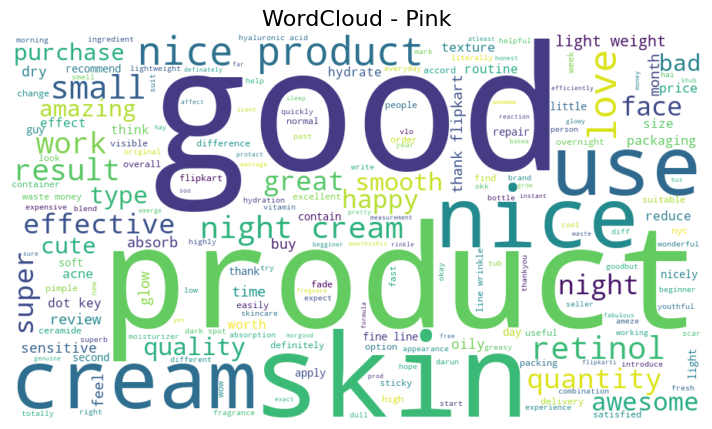

In [135]:
# WordClouds for Overall + Each Moisturizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(text, title):
    wc = WordCloud(width=900, height=500, background_color="white").generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Overall
show_wordcloud(df['clean_text'], "Overall WordCloud")

# For each moisturizer
for v in variants:
    show_wordcloud(variant_dfs[v]['clean_text'], f"WordCloud - {v}")

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1590699405.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


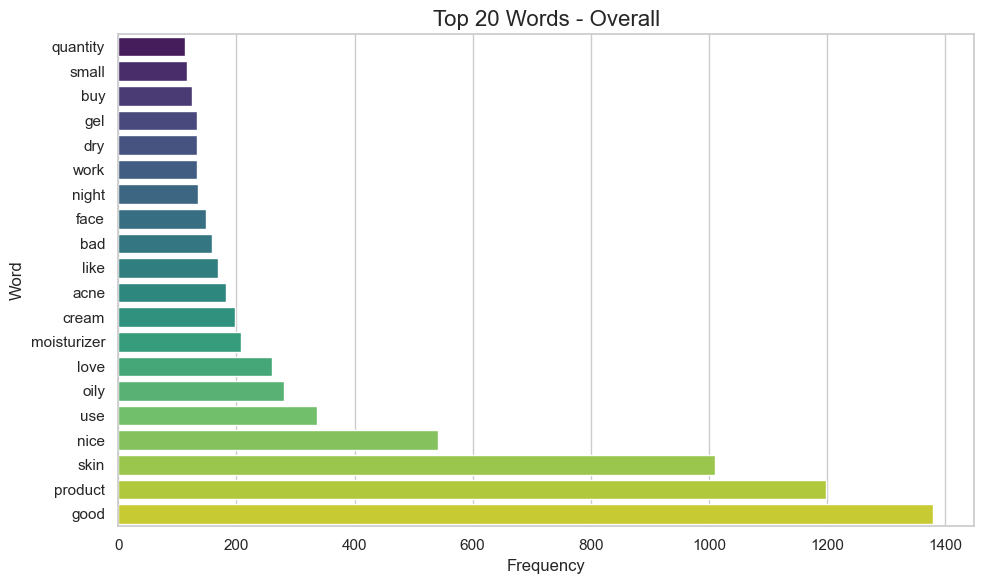

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1590699405.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


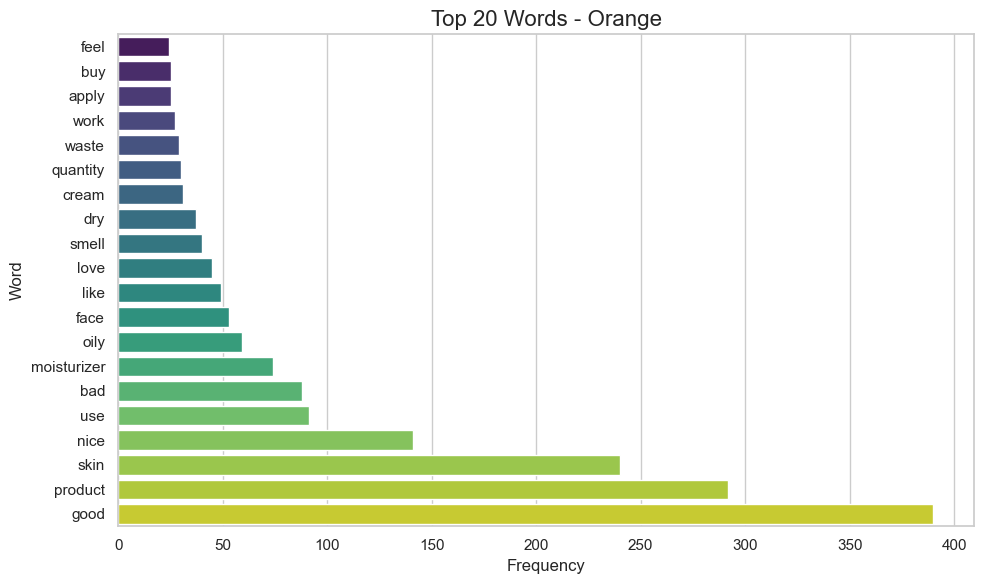

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1590699405.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


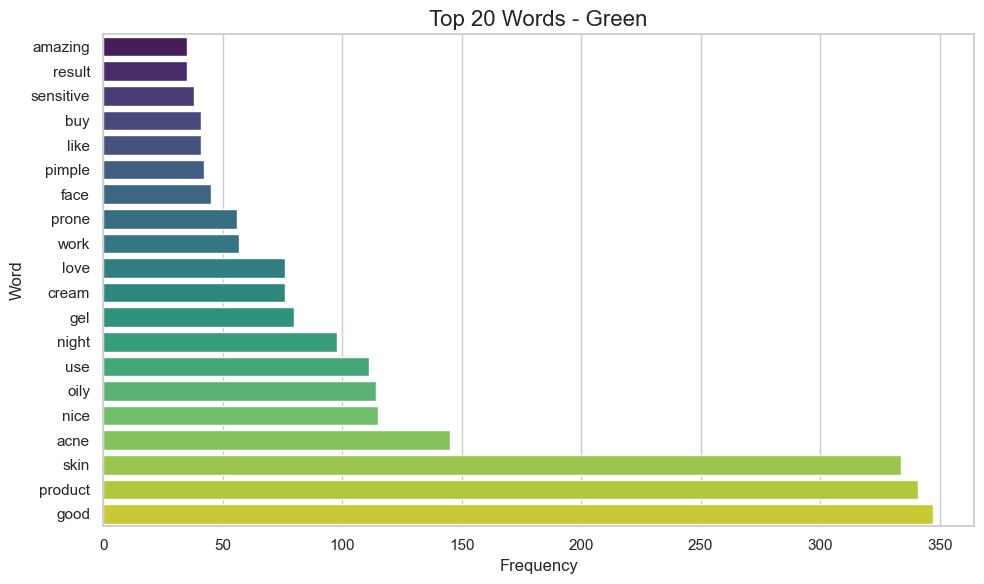

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1590699405.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


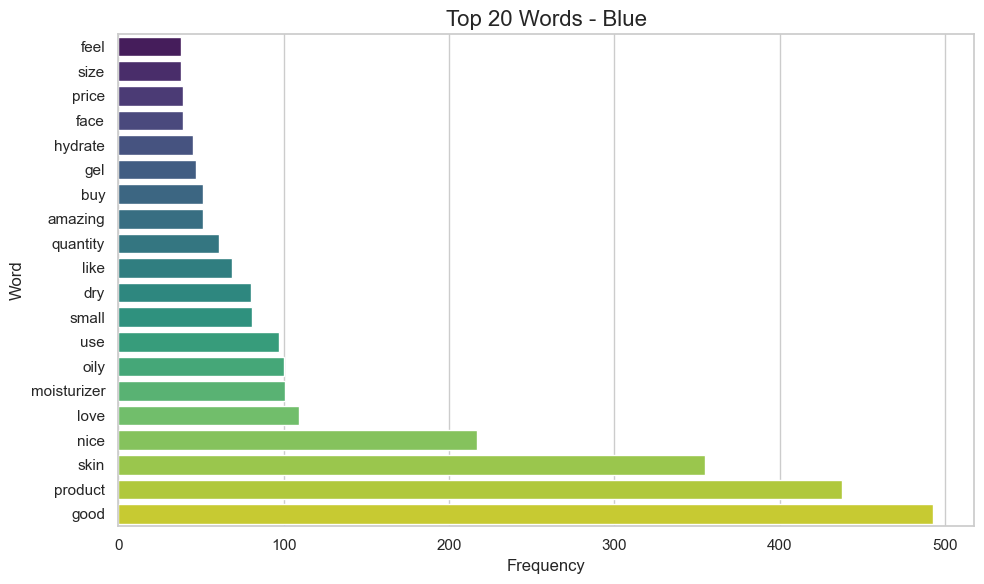

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1590699405.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


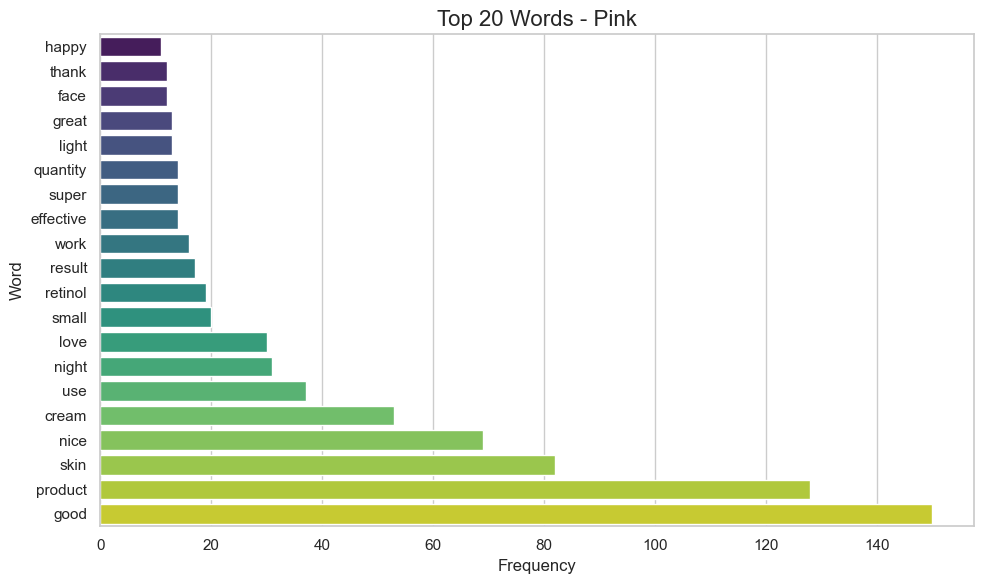

In [149]:
# Word Frequency Bar Plot (Top 20 Words per Moisturizer)

# saving the word frequency of all the data and for individual moisturizers
from collections import Counter
import pandas as pd

# overall
overall_words = " ".join(df['clean_text']).split()
overall_freq = Counter(overall_words)
overall_freq_df = pd.DataFrame(overall_freq.most_common(50), columns=['word', 'count'])
overall_freq_df.to_excel("overall_word_frequency.xlsx", index=False)

# per moisturizer
variant_freq_tables = {}

for v in variants:
    words = " ".join(variant_dfs[v]['clean_text']).split()
    freq = Counter(words)
    freq_df = pd.DataFrame(freq.most_common(50), columns=['word', 'count'])
    freq_df.to_excel(f"word_freq_{v}.xlsx", index=False)
    variant_freq_tables[v] = freq_df


#Plotting the graphs
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

def plot_top_words(df_words, title):
    plt.figure(figsize=(10, 6))
    df_words = df_words.head(20).sort_values(by="count", ascending=True)
    
    sns.barplot(y="word", x="count", data=df_words, palette="viridis")
    
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Word", fontsize=12)
    plt.tight_layout()
    plt.show()

# overall
plot_top_words(overall_freq_df, "Top 20 Words - Overall")

# per moisturizer
for v in variants:
    plot_top_words(variant_freq_tables[v], f"Top 20 Words - {v}")



In [139]:
df.to_excel("cleaned_reviews.xlsx", index=False)

> Successfully preprocessed the text of Reviews column and saved it to "cleaned_reviews.xlsx" File
> 
> Word cloud visualization + Top 20 Frequent words of total reviews and for individual moisturizers were also plotted above


### Analysis 02: NER and POS Tagging

In [160]:
# creating a function that extracts:nouns, adjectives, verbs, named entities

import spacy
nlp = spacy.load("en_core_web_sm")

def extract_pos_ner(text):
    doc = nlp(text)
    
    nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
    adjs = [token.lemma_ for token in doc if token.pos_ == "ADJ"]
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    ents  = [ent.text for ent in doc.ents]
    
    return pd.Series([nouns, adjs, verbs, ents])

df[['nouns', 'adjs', 'verbs', 'entities']] = df['clean_text'].apply(extract_pos_ner)

In [162]:
from collections import Counter

def get_top_terms(series, top_n=20):
    all_words = []
    for row in series:
        if isinstance(row, list):
            all_words.extend(row)
    return Counter(all_words).most_common(top_n)

# overall tables
top_nouns_overall = get_top_terms(df['nouns'])
top_adjs_overall  = get_top_terms(df['adjs'])
top_ents_overall  = get_top_terms(df['entities'])


In [164]:
pd.DataFrame(top_nouns_overall, columns=['word','count']).to_excel("overall_top_nouns.xlsx", index=False)
pd.DataFrame(top_adjs_overall, columns=['word','count']).to_excel("overall_top_adjectives.xlsx", index=False)
pd.DataFrame(top_ents_overall, columns=['entity','count']).to_excel("overall_top_entities.xlsx", index=False)

In [168]:
variant_pos_tables = {}

for v in variants:
    sub = df[df['Moisturizer'] == v]

    top_nouns = get_top_terms(sub['nouns'])
    top_adjs  = get_top_terms(sub['adjs'])
    top_ents  = get_top_terms(sub['entities'])

    variant_pos_tables[v] = {
        'nouns': pd.DataFrame(top_nouns, columns=['word','count']),
        'adjs':  pd.DataFrame(top_adjs,  columns=['word','count']),
        'ents':  pd.DataFrame(top_ents,  columns=['entity','count'])
    }

    # save as Excel
    variant_pos_tables[v]['nouns'].to_excel(f"{v}_top_nouns.xlsx", index=False)
    variant_pos_tables[v]['adjs'].to_excel(f"{v}_top_adjectives.xlsx", index=False)
    variant_pos_tables[v]['ents'].to_excel(f"{v}_top_entities.xlsx", index=False)


/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


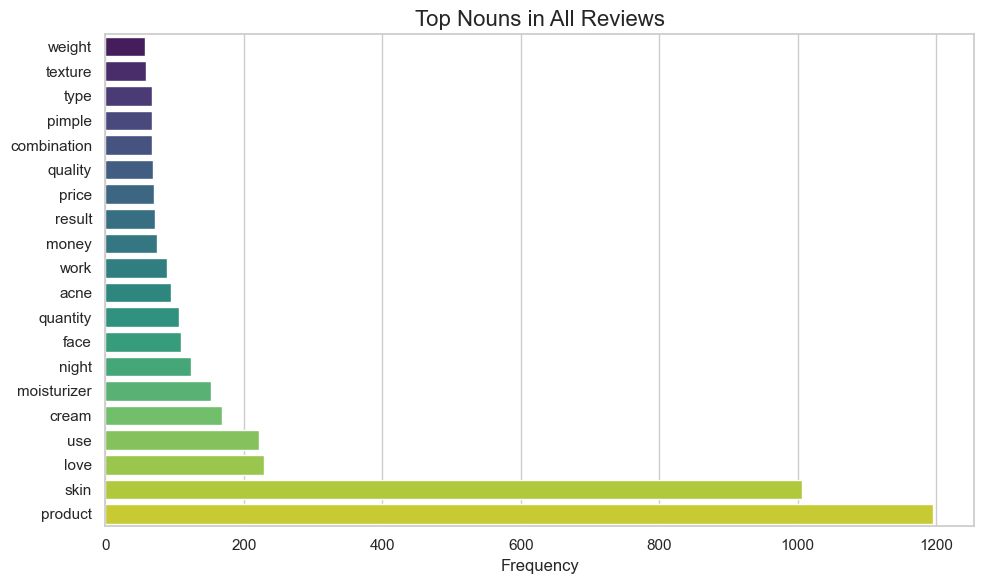

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


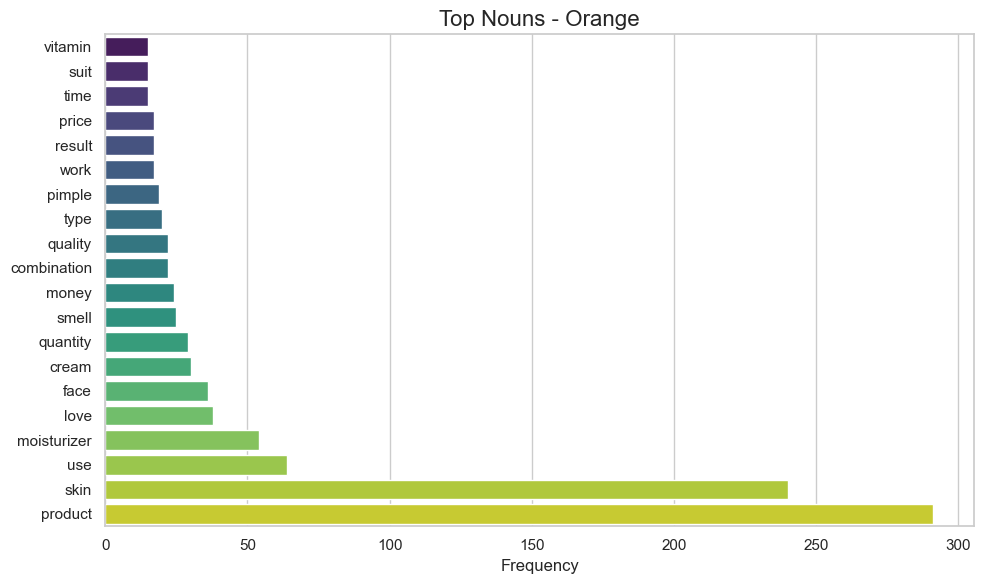

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


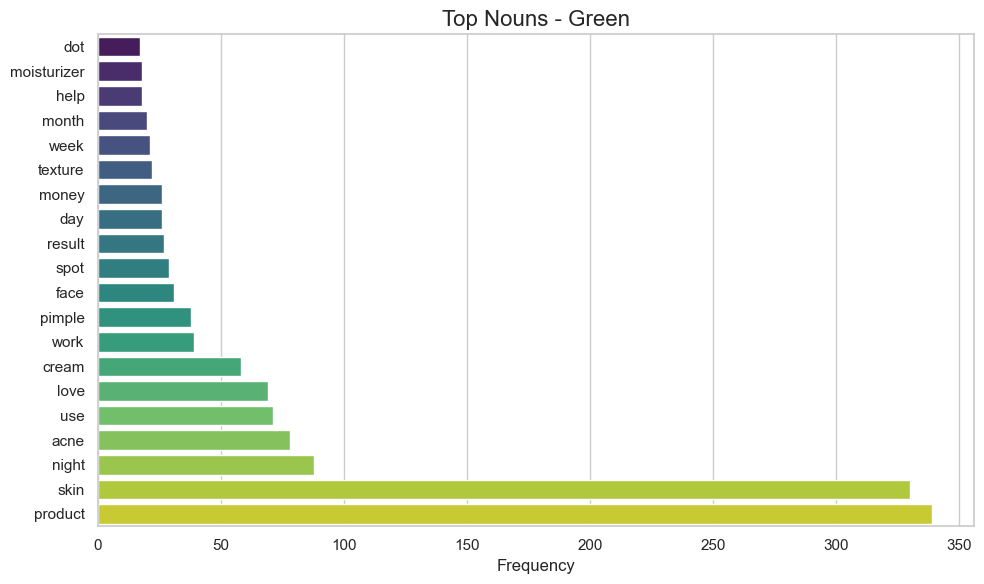

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


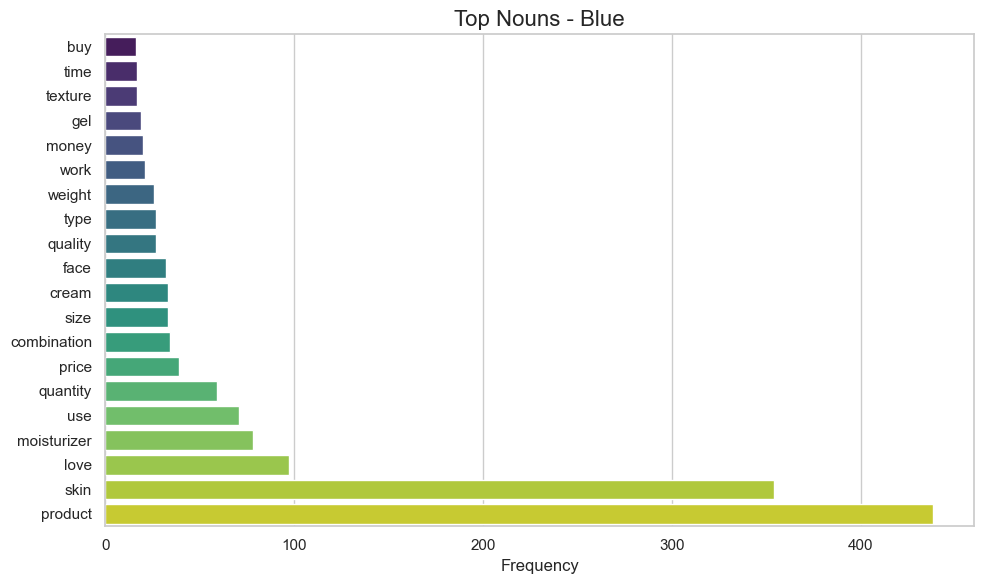

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


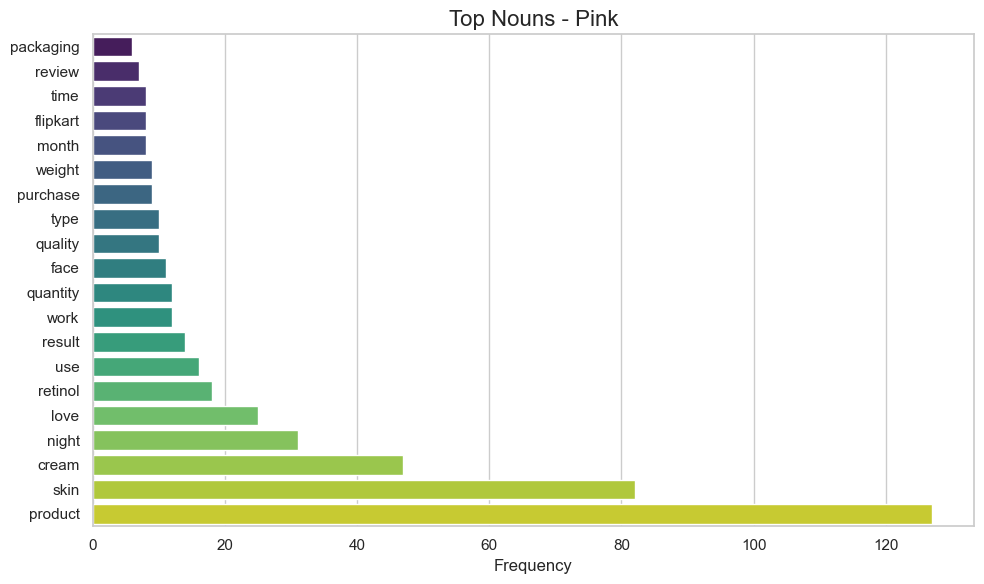

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

def plot_bar(df_words, title, xlabel):
    df_words = df_words.sort_values(by=df_words.columns[1], ascending=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# Example visualizations:

# overall nouns
plot_bar(pd.DataFrame(top_nouns_overall, columns=['word','count']),
         "Top Nouns in All Reviews", "Frequency")

# for each moisturizer
for v in variants:
    plot_bar(variant_pos_tables[v]['nouns'],
             f"Top Nouns - {v}",
             "Frequency")


/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


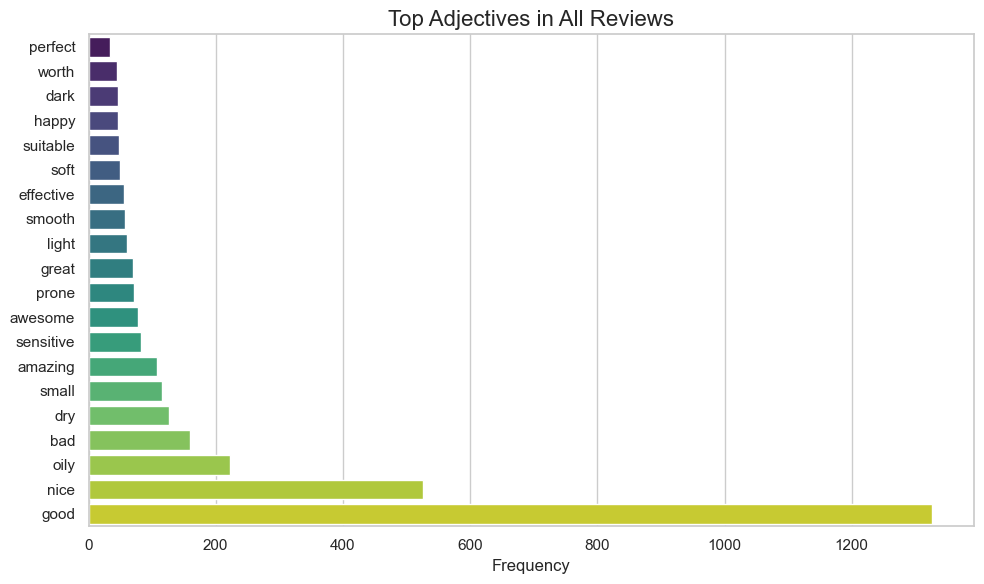

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


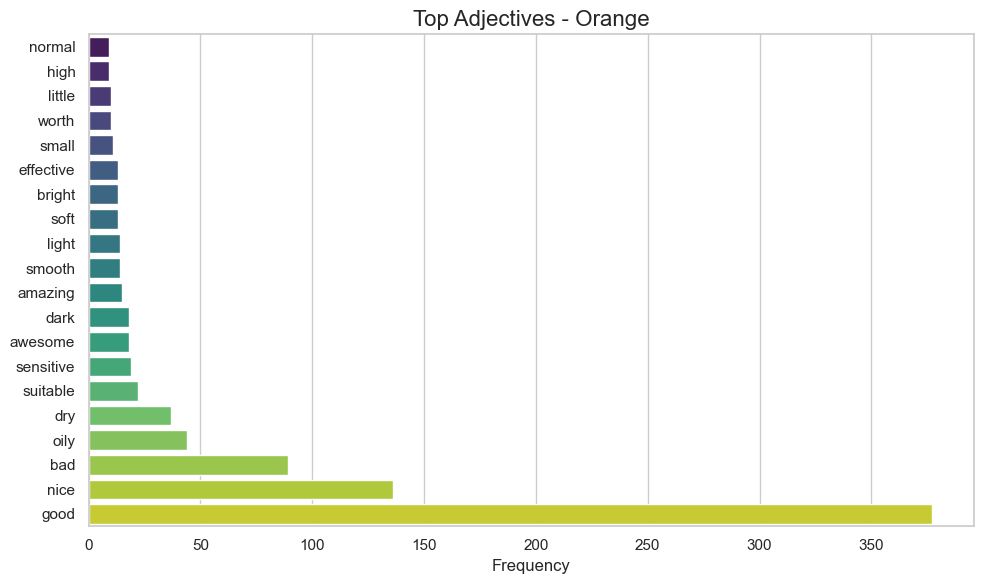

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


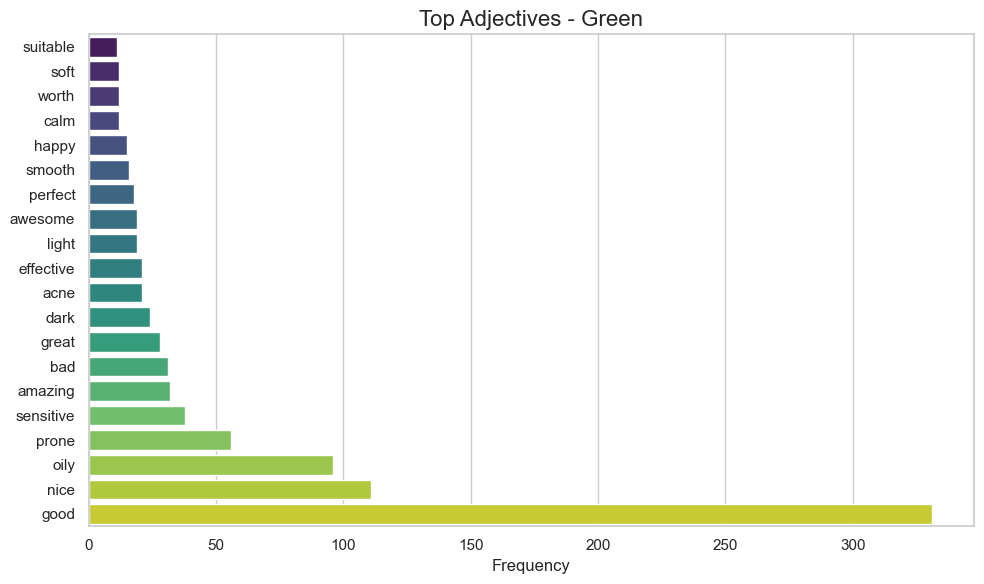

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


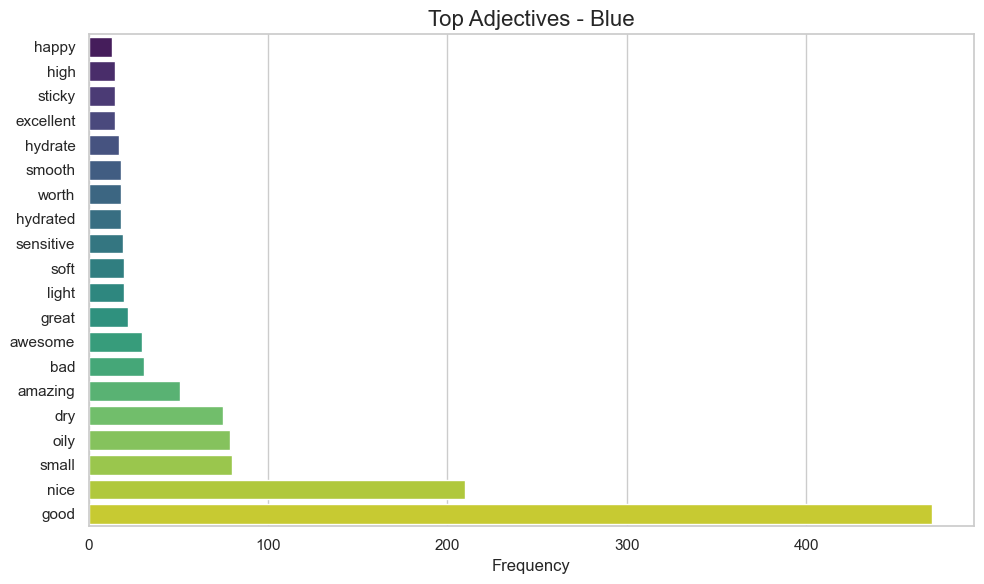

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


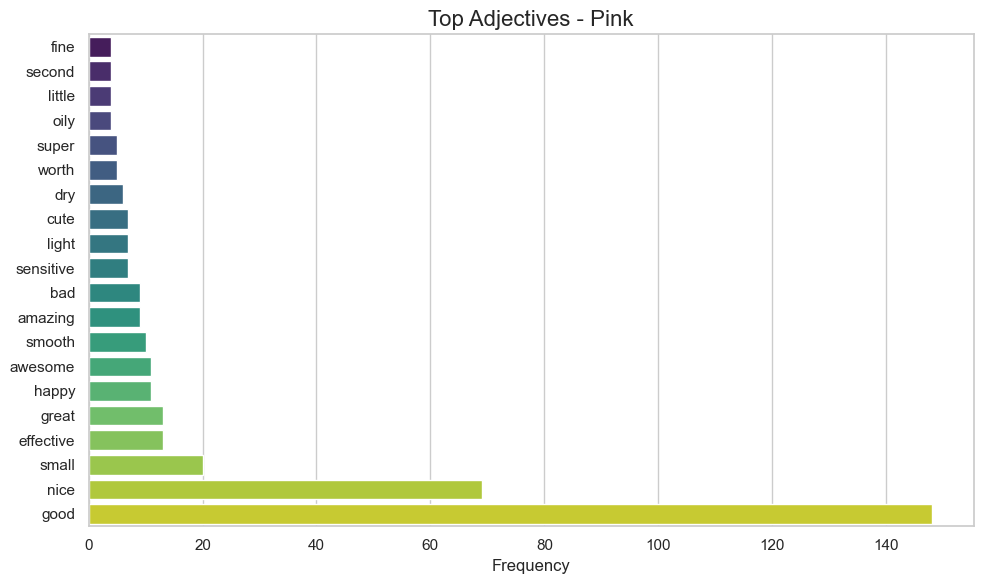

In [172]:
# Adjectives Visualization

top_adjs_overall_df = pd.DataFrame(top_adjs_overall, columns=['word','count'])
plot_bar(top_adjs_overall_df, "Top Adjectives in All Reviews", "Frequency")

for v in variants:
    plot_bar(variant_pos_tables[v]['adjs'],
             f"Top Adjectives - {v}",
             "Frequency")


/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


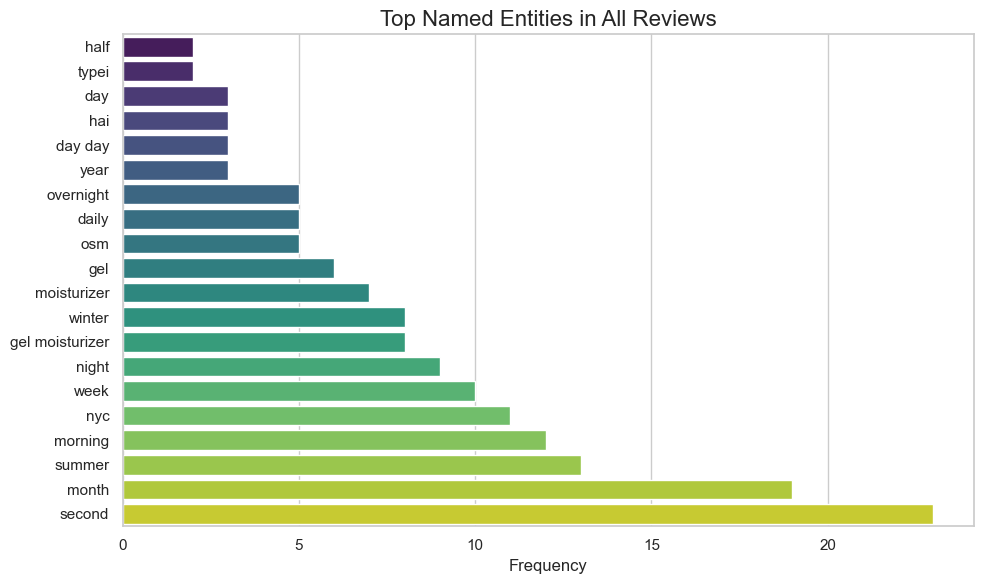

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


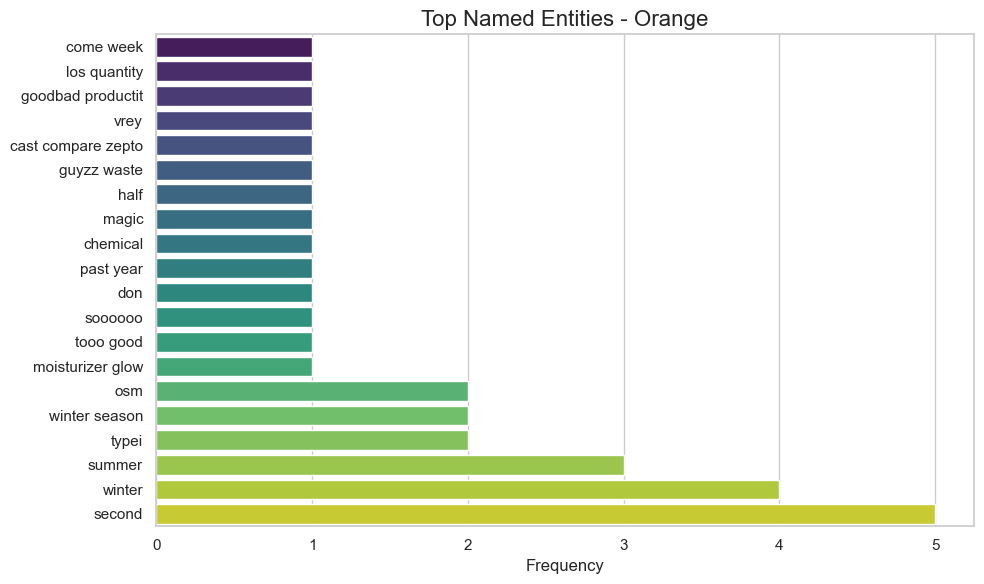

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


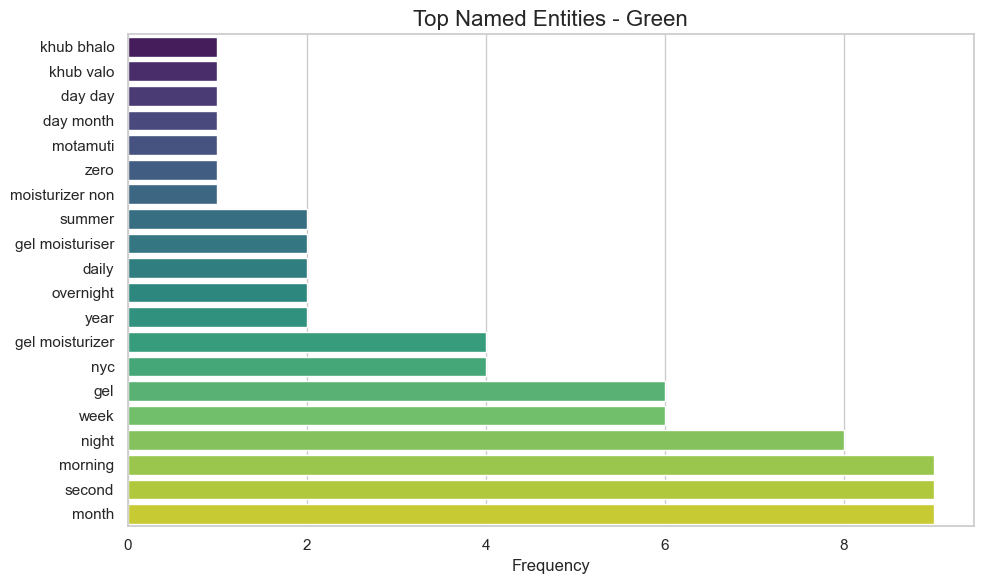

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


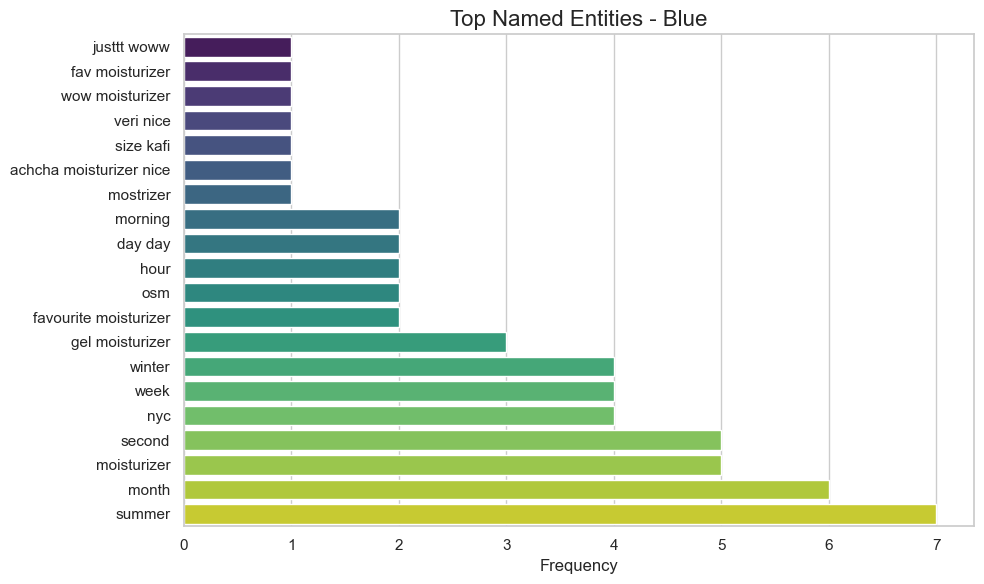

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/466777336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_words.columns[0], x=df_words.columns[1], data=df_words, palette="viridis")


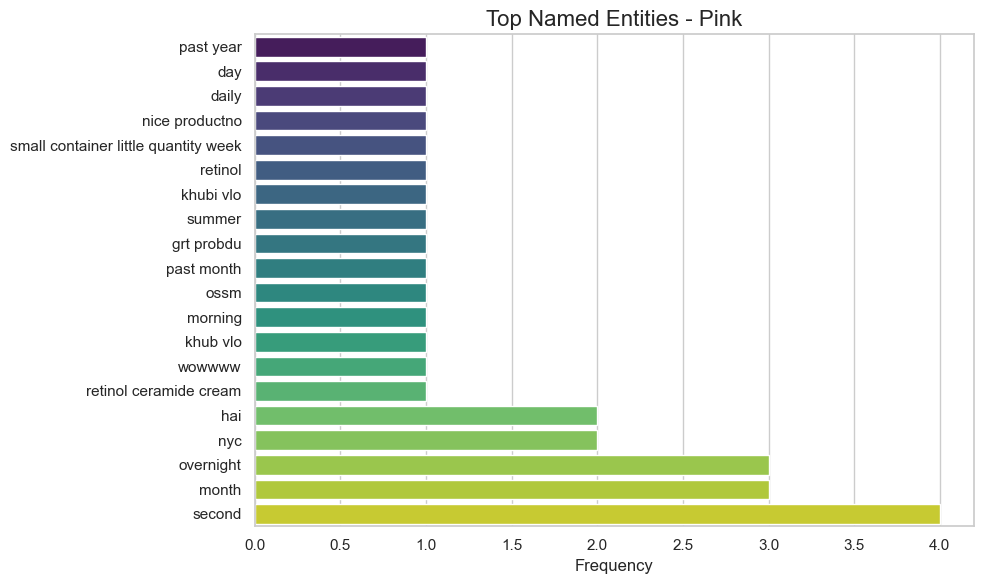

In [176]:
# NER Visualizations

df['entities']

top_entities_overall_df = pd.DataFrame(top_ents_overall, columns=['entity','count'])
plot_bar(top_entities_overall_df, "Top Named Entities in All Reviews", "Frequency")

for v in variants:
    plot_bar(variant_pos_tables[v]['ents'],
             f"Top Named Entities - {v}",
             "Frequency")


### Analysis 03: Feature Extraction - BoW, TF-IDF, Word2Vec(Embeddings)

In [193]:
## BOW

In [181]:
# BoW Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=50)  # top 50 words
bow_matrix = bow.fit_transform(df['clean_text'])

bow_features = pd.DataFrame(bow_matrix.toarray(), columns=bow.get_feature_names_out())
bow_features.head()

,absorb,acne,amazing,apply,awesome,bad,buy,combination,cream,dark,...,smooth,suit,super,texture,time,type,use,waste,weight,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# Get Overall Top Words from BoW

bow_sum = bow_features.sum().sort_values(ascending=False)
bow_sum.head(20)

good           1380
product        1199
skin           1011
nice            542
use             336
oily            280
love            260
moisturizer     208
cream           197
acne            182
like            168
bad             159
face            149
night           134
gel             133
work            133
dry             133
buy             124
small           116
quantity        112
dtype: int64

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/672609088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bow_sum.head(20), y=bow_sum.head(20).index, palette="viridis")


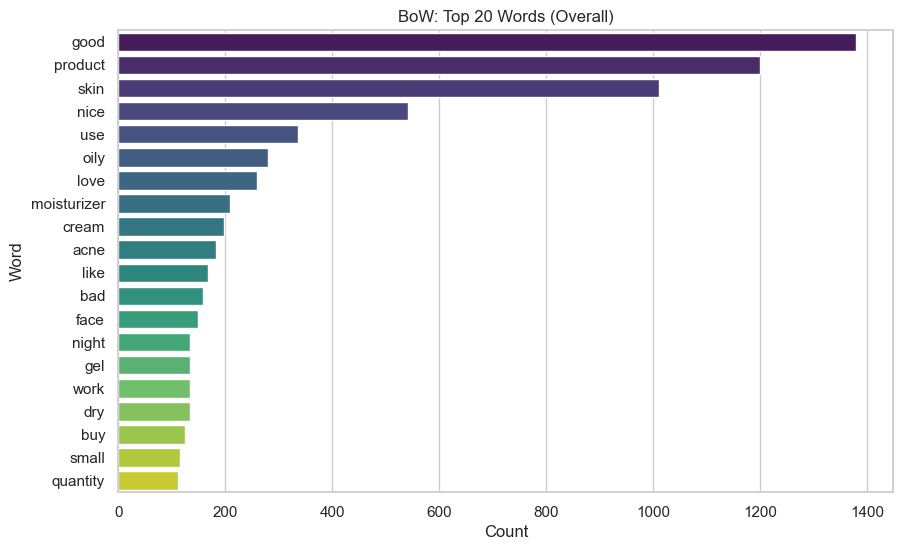

In [185]:
plt.figure(figsize=(10,6))
sns.barplot(x=bow_sum.head(20), y=bow_sum.head(20).index, palette="viridis")
plt.title("BoW: Top 20 Words (Overall)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1445919675.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bow_per_variant[v].head(15),


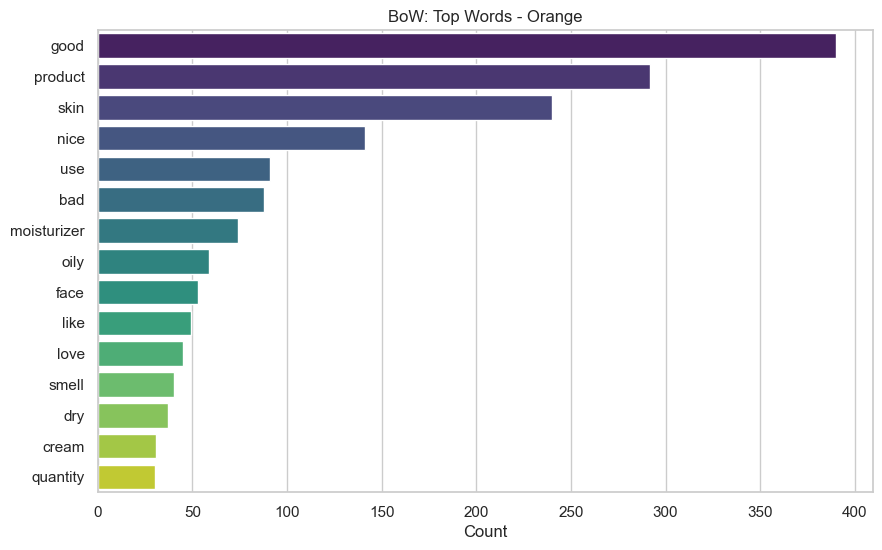

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1445919675.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bow_per_variant[v].head(15),


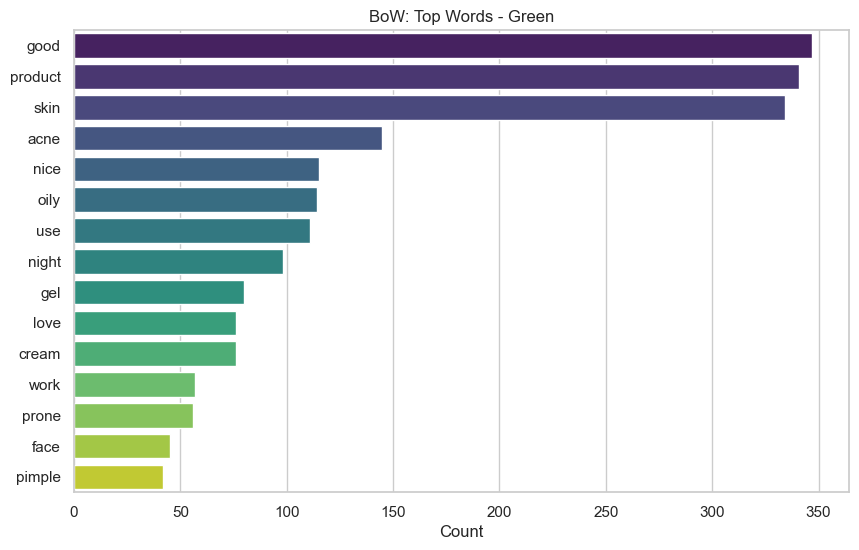

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1445919675.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bow_per_variant[v].head(15),


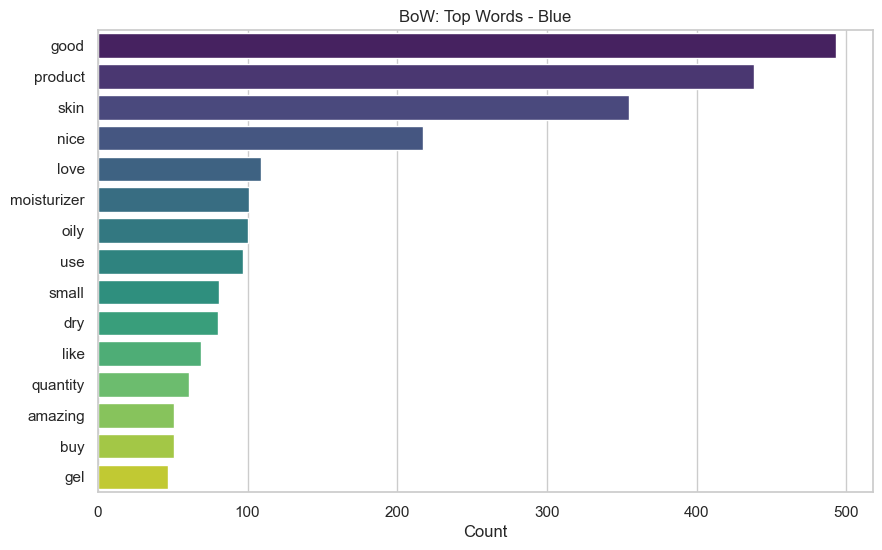

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1445919675.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bow_per_variant[v].head(15),


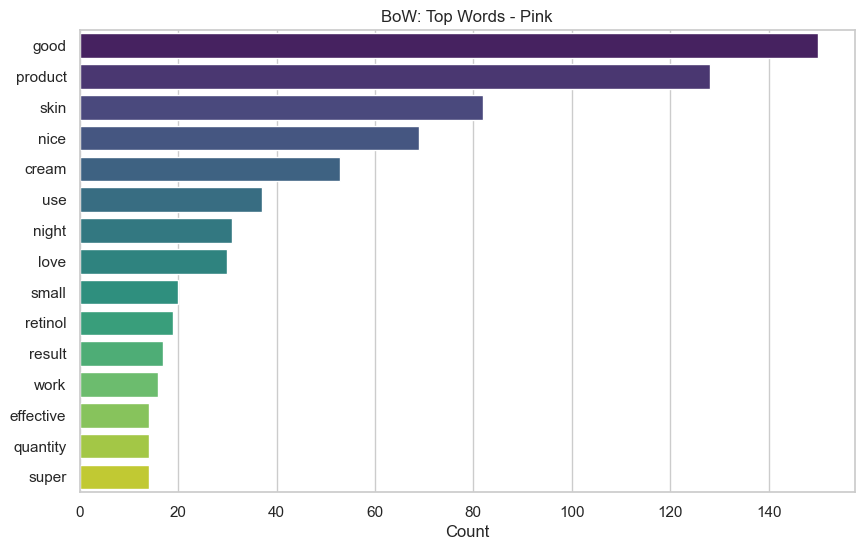

In [189]:
# BoW for Each Moisturizer

bow_per_variant = {}

for v in variants:
    sub = df[df['Moisturizer'] == v]['clean_text']
    vec = CountVectorizer(max_features=30)
    mat = vec.fit_transform(sub)
    bow_df = pd.DataFrame(mat.toarray(), columns=vec.get_feature_names_out())
    bow_per_variant[v] = bow_df.sum().sort_values(ascending=False)

for v in variants:
    plt.figure(figsize=(10,6))
    sns.barplot(x=bow_per_variant[v].head(15),
                y=bow_per_variant[v].head(15).index,
                palette="viridis")
    plt.title(f"BoW: Top Words - {v}")
    plt.xlabel("Count")
    plt.ylabel("")
    plt.show()


In [191]:
## TF-IDF

In [195]:
# TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.head()


,absorb,acne,amazing,apply,awesome,bad,buy,combination,cream,dark,...,smooth,suit,super,texture,time,type,use,waste,weight,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.565972,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)
tfidf_mean.head(20)

good           0.222566
product        0.157331
nice           0.113221
skin           0.086842
love           0.045141
use            0.038550
oily           0.034855
bad            0.031889
moisturizer    0.028956
cream          0.024636
small          0.024119
like           0.023732
amazing        0.021921
quantity       0.020683
acne           0.020516
work           0.020462
awesome        0.019622
face           0.019461
buy            0.018334
dry            0.017916
dtype: float64

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/3866832775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.head(20),


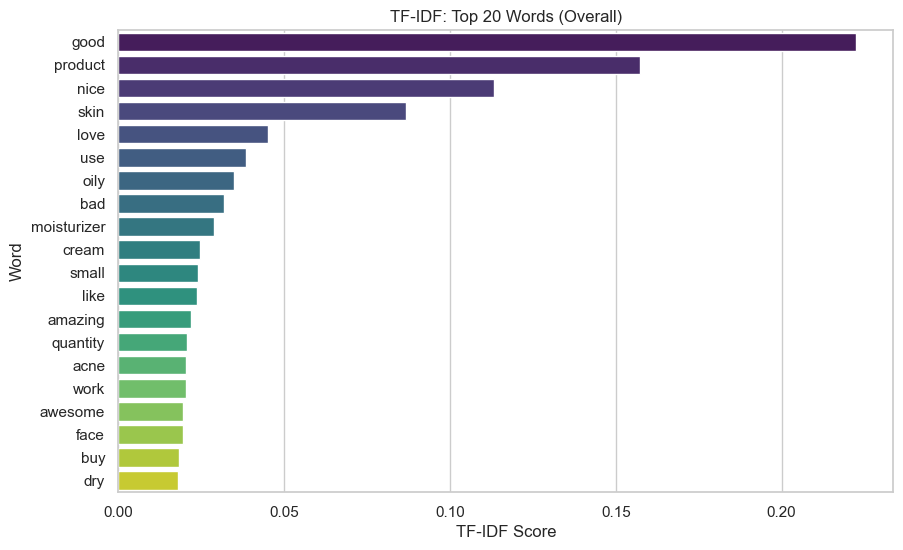

In [201]:
plt.figure(figsize=(10,6))
sns.barplot(x=tfidf_mean.head(20),
            y=tfidf_mean.head(20).index,
            palette="viridis")
plt.title("TF-IDF: Top 20 Words (Overall)")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.show()


/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/3517513990.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_per_variant[v].head(15),


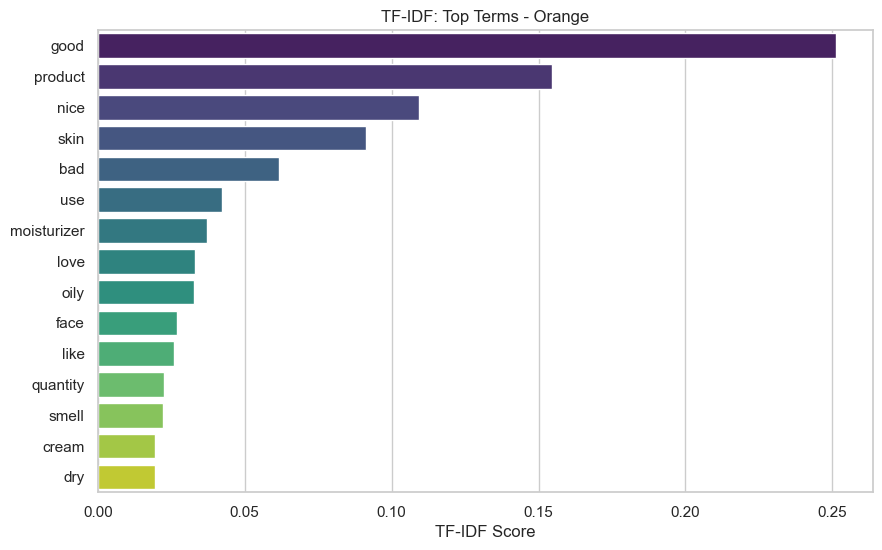

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/3517513990.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_per_variant[v].head(15),


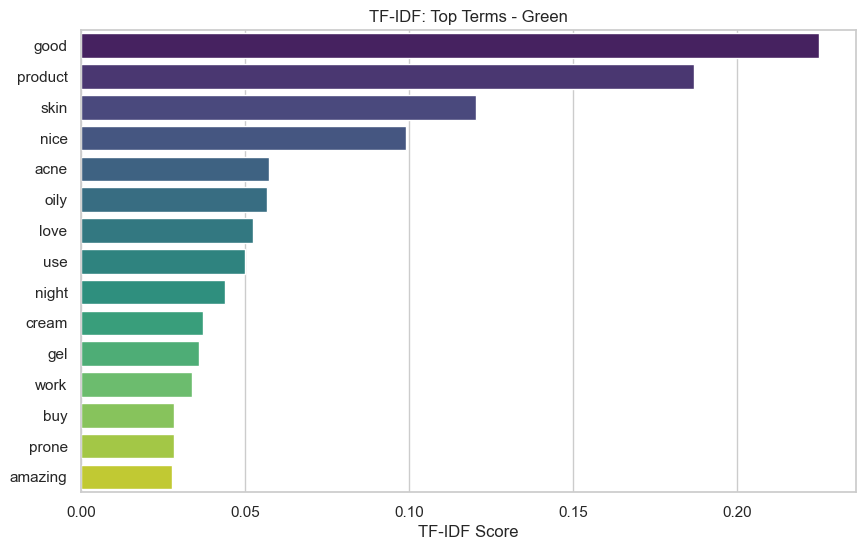

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/3517513990.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_per_variant[v].head(15),


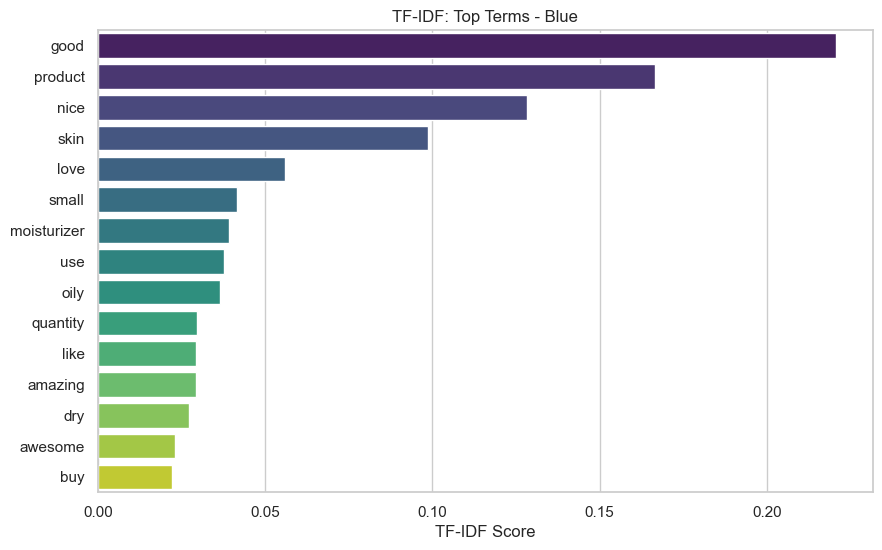

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/3517513990.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_per_variant[v].head(15),


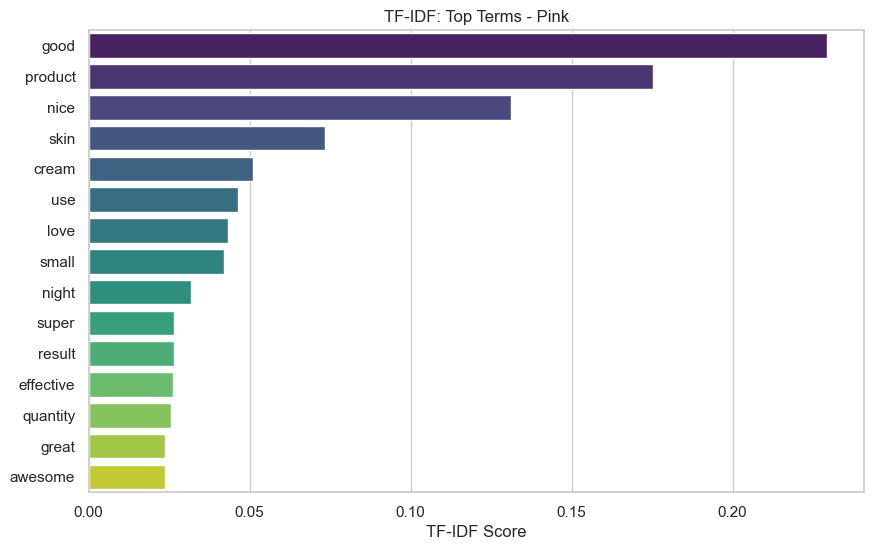

In [205]:
#TF-IDF Per Moisturizer

tfidf_per_variant = {}

for v in variants:
    sub = df[df['Moisturizer'] == v]['clean_text']
    vec = TfidfVectorizer(max_features=30)
    mat = vec.fit_transform(sub)
    tfidf_df2 = pd.DataFrame(mat.toarray(), columns=vec.get_feature_names_out())
    tfidf_per_variant[v] = tfidf_df2.mean().sort_values(ascending=False)

for v in variants:
    plt.figure(figsize=(10,6))
    sns.barplot(x=tfidf_per_variant[v].head(15),
                y=tfidf_per_variant[v].head(15).index,
                palette="viridis")
    plt.title(f"TF-IDF: Top Terms - {v}")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("")
    plt.show()


In [207]:
## Word2Vec

In [220]:
## creating tokens 

import pandas as pd
df['tokens'] = df['clean_text'].fillna("").apply(lambda s: s.split())
df = df[df['tokens'].map(len) > 0].reset_index(drop=True)
df.to_excel("cleaned_with_tokens.xlsx", index=False)
print("Rows:", len(df))
print("Example tokens:", df.loc[0, 'tokens'][:20])
print("Unique variants:", df['Moisturizer'].unique())


Rows: 3510
Example tokens: ['product', 'good', 'combination', 'skin', 'good', 'effect', 'winter', 'order', 'thank', 'flipkart']
Unique variants: ['Orange' 'Green' 'Blue' 'Pink']


In [222]:
#Prepare Tokens
sentences = df['tokens'].tolist()

In [224]:
#Train Word2Vec 

from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences,
                     vector_size=100,
                     window=5,
                     min_count=2,
                     workers=4)

In [226]:
#Check Similar Words for Key Cosmetics Terms

words_to_check = ["skin", "hydration", "moisturizer", "face", "acne"]

for w in words_to_check:
    if w in w2v_model.wv:
        print(f"\nTop similar words to '{w}':")
        print(w2v_model.wv.most_similar(w, topn=10))



Top similar words to 'skin':
[('use', 0.9996995329856873), ('absorb', 0.9996106028556824), ('feel', 0.999605655670166), ('cream', 0.9995949864387512), ('face', 0.9995852112770081), ('apply', 0.9995631575584412), ('texture', 0.9995597004890442), ('acne', 0.9995590448379517), ('week', 0.9995404481887817), ('time', 0.9995313882827759)]

Top similar words to 'hydration':
[('absorb', 0.999095618724823), ('like', 0.9990822672843933), ('cream', 0.9990435838699341), ('look', 0.9990308880805969), ('acne', 0.9990228414535522), ('gel', 0.9989984035491943), ('buy', 0.9989780783653259), ('reduce', 0.998971700668335), ('work', 0.9989582896232605), ('moisturizer', 0.9989453554153442)]

Top similar words to 'moisturizer':
[('texture', 0.9995430111885071), ('use', 0.9995175004005432), ('skin', 0.9995023608207703), ('like', 0.999484121799469), ('gel', 0.9994711875915527), ('time', 0.9994479417800903), ('absorb', 0.9994423985481262), ('spot', 0.9994350075721741), ('dark', 0.9994264245033264), ('feel', 0

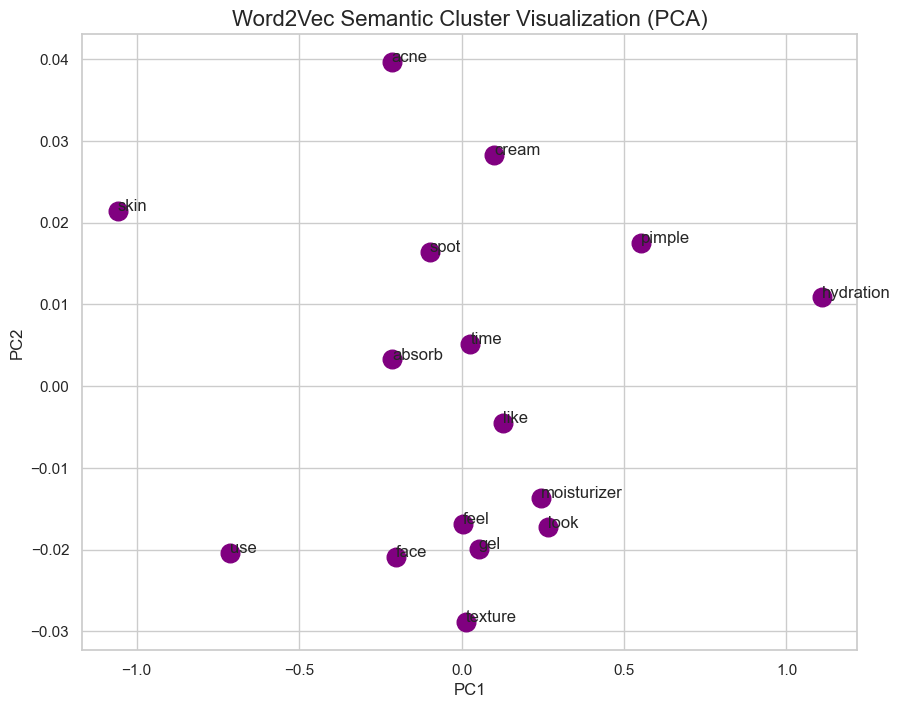

In [238]:
import numpy as np

from sklearn.decomposition import PCA

# same word list + auto-expand with 5 similar words each
base_words = ["skin", "hydration", "moisturizer", "acne", "face", "cream"]
words = []

# gather similar words (top 5 for each)
for w in base_words:
    if w in w2v_model.wv.index_to_key:
        words.append(w)
        for sim_word, score in w2v_model.wv.most_similar(w, topn=5):
            words.append(sim_word)

# unique list
words = list(set(words))

# get vectors
vectors = np.array([w2v_model.wv[w] for w in words])

# reduce dimensions
pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)

# plot
plt.figure(figsize=(10,8))
plt.scatter(coords[:,0], coords[:,1], s=180, color='purple')

for i, word in enumerate(words):
    plt.annotate(word, (coords[i,0], coords[i,1]))

plt.title("Word2Vec Semantic Cluster Visualization (PCA)", fontsize=16)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()



### Analysis 04: Sentiment Analysis

In [241]:
# 4.A VADER LEXICON-BASED SENTIMENT ANALYSIS

In [243]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sivaramprakhash/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [251]:
## Apply VADER to Each Review

def vader_sentiment(text):
    if not isinstance(text, str):
        return 0
    return sia.polarity_scores(text)['compound']

df['vader_score'] = df['Review'].fillna("").apply(vader_sentiment)
df.head()

,Moisturizer,Rating,Review,Name,clean_text,nouns,adjs,verbs,entities,tokens,vader_score,vader_label
0,Orange,5,This product is really good I have combination...,Komal Sen,product good combination skin good effect wint...,"[product, combination, skin, effect, winter, o...","[good, good]",[thank],[winter],"[product, good, combination, skin, good, effec...",0.8634,Positive
1,Orange,5,Very nice product,Flipkart Customer,nice product,[product],[nice],[],[],"[nice, product]",0.4754,Positive
2,Orange,5,Too good 👍,Meenakshi Thapan,good,[],[good],[],[],[good],0.4404,Positive
3,Orange,5,Good 👍,Zeba Ahmad,good,[],[good],[],[],[good],0.4404,Positive
4,Orange,5,Growly skin but increases acne,Flipkart Customer,growly skin increase acne,"[skin, increase, acne]",[],[],[],"[growly, skin, increase, acne]",0.0000,Neutral


In [253]:
## Convert Scores Into Labels

def label_vader(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['vader_label'] = df['vader_score'].apply(label_vader)


/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1366917114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_label', palette="viridis")


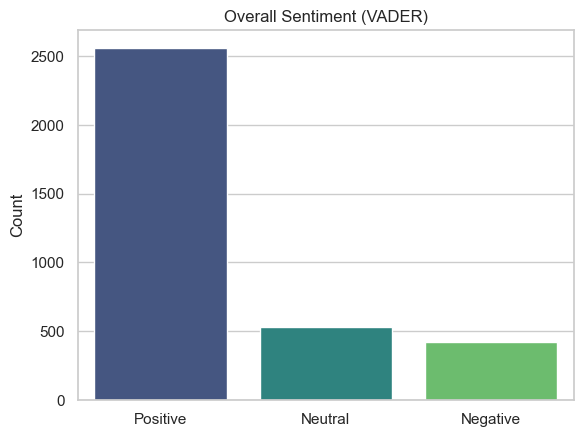

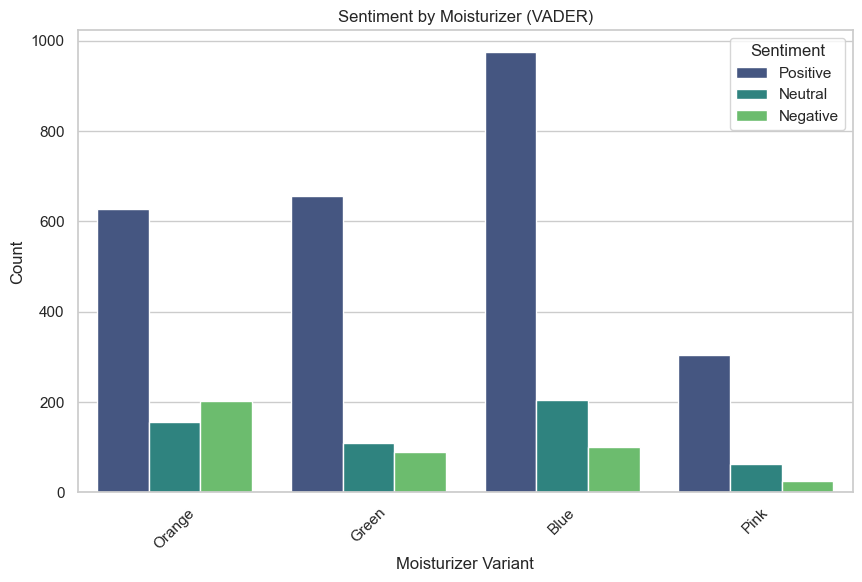

In [257]:
# Visualizations

sns.countplot(data=df, x='vader_label', palette="viridis")
plt.title("Overall Sentiment (VADER)")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Moisturizer', hue='vader_label', palette="viridis")
plt.title("Sentiment by Moisturizer (VADER)")
plt.xlabel("Moisturizer Variant")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()




In [259]:
# 4.B — MACHINE LEARNING SENTIMENT MODEL

In [263]:
#Create a Sentiment Label From Ratings
def rating_to_label(r):
    if r >= 4:
        return "Positive"
    elif r == 3:
        return "Neutral"
    else:
        return "Negative"

df['rating_label'] = df['Rating'].apply(rating_to_label)


In [265]:
# Split Data
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['rating_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [267]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_ml = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf_ml.fit_transform(X_train)
X_test_vec = tfidf_ml.transform(X_test)

In [269]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300)
model.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


In [271]:
# Evaluate

from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8048433048433048
              precision    recall  f1-score   support

    Negative       0.75      0.51      0.61       111
     Neutral       0.50      0.07      0.13        82
    Positive       0.82      0.99      0.89       509

    accuracy                           0.80       702
   macro avg       0.69      0.52      0.54       702
weighted avg       0.77      0.80      0.76       702



In [273]:
df['ml_sentiment'] = model.predict(tfidf_ml.transform(df['clean_text']))


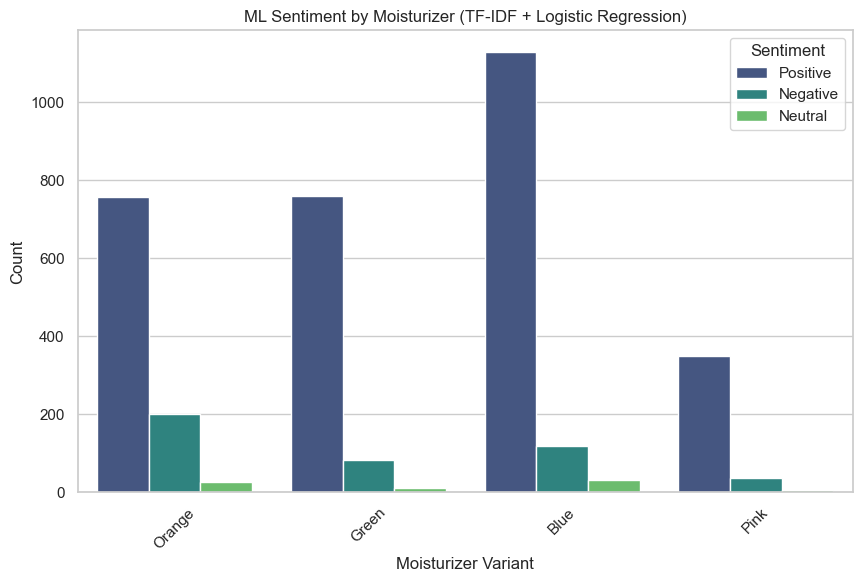

In [277]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Moisturizer', hue='ml_sentiment', palette="viridis")
plt.title("ML Sentiment by Moisturizer (TF-IDF + Logistic Regression)")
plt.xlabel("Moisturizer Variant")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

### Analysis 05: Topic Modelling (LDA)

In [283]:
# Prepare Text for Topic Modelling

docs = df['clean_text'].tolist()
docs = [d.split() for d in docs if isinstance(d, str) and len(d) > 2]

In [285]:
# Build Dictionary and Corpus

from gensim.corpora import Dictionary

dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=5, no_above=0.5)  # remove rare/common words
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [287]:
# Train LDA Model (Overall Topics)

from gensim.models import LdaModel

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=4,
    passes=10,
    random_state=42
)

In [289]:
topics = lda_model.print_topics(num_words=7)
for t in topics:
    print(t)


(0, '0.070*"love" + 0.069*"use" + 0.066*"product" + 0.060*"skin" + 0.047*"like" + 0.039*"face" + 0.032*"amazing"')
(1, '0.233*"good" + 0.188*"skin" + 0.069*"oily" + 0.030*"acne" + 0.030*"moisturizer" + 0.028*"dry" + 0.023*"work"')
(2, '0.154*"nice" + 0.089*"cream" + 0.048*"night" + 0.032*"money" + 0.029*"buy" + 0.028*"use" + 0.026*"effective"')
(3, '0.305*"product" + 0.150*"good" + 0.071*"nice" + 0.045*"small" + 0.043*"bad" + 0.040*"quantity" + 0.028*"awesome"')


In [291]:
import pandas as pd

def topic_to_df(topic):
    pairs = topic.split(" + ")
    words = []
    weights = []
    for p in pairs:
        weight, word = p.split("*")
        words.append(word.replace('"', ''))
        weights.append(float(weight))
    return pd.DataFrame({"word": words, "weight": weights})


/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/2901954940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_topic, x="weight", y="word", palette="viridis")


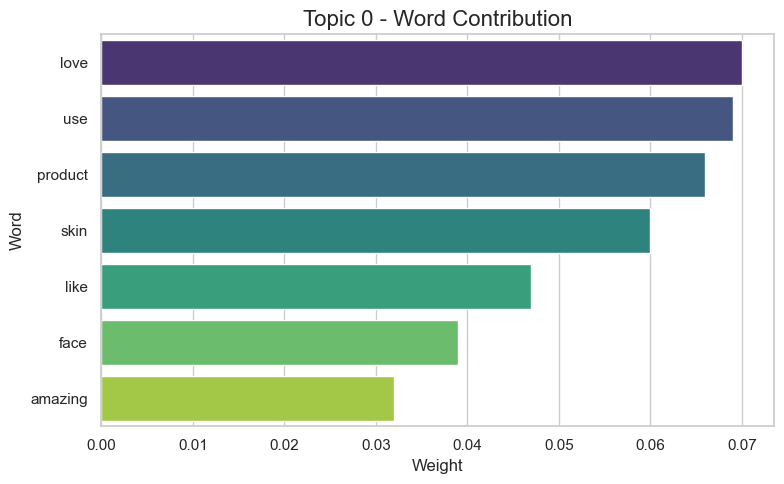

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/2901954940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_topic, x="weight", y="word", palette="viridis")


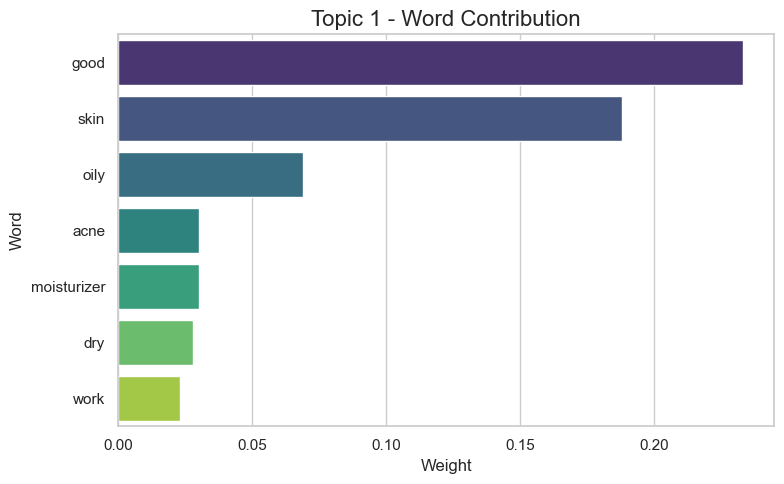

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/2901954940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_topic, x="weight", y="word", palette="viridis")


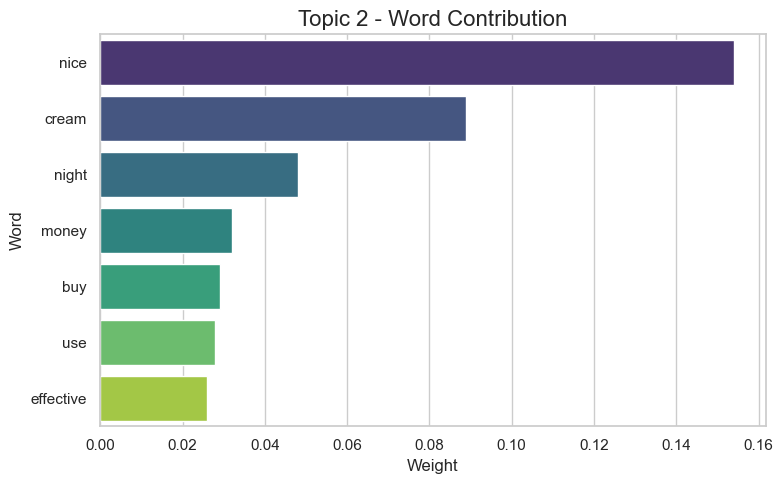

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/2901954940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_topic, x="weight", y="word", palette="viridis")


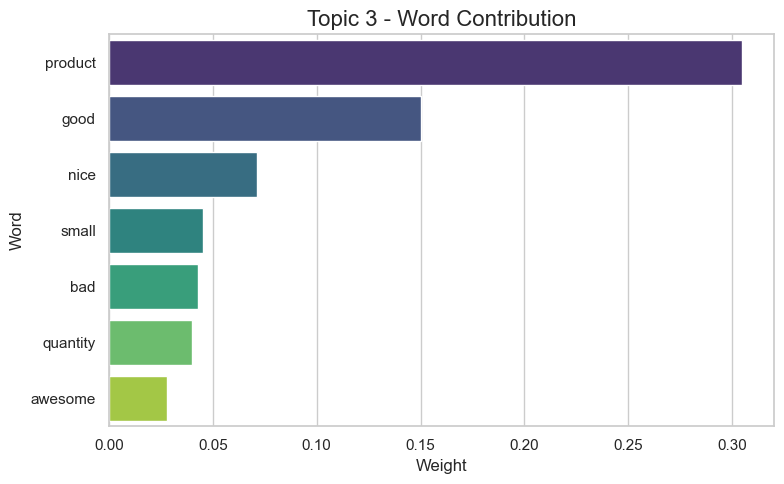

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for i, topic in topics:
    df_topic = topic_to_df(topic)
    plt.figure(figsize=(8,5))
    sns.barplot(data=df_topic, x="weight", y="word", palette="viridis")
    plt.title(f"Topic {i} - Word Contribution", fontsize=16)
    plt.xlabel("Weight")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()


In [299]:
# Topic Modelling for Each Moisturizer

variant_topics = {}

for v in variants:
    sub_docs = df[df['Moisturizer'] == v]['clean_text'].tolist()
    sub_docs = [d.split() for d in sub_docs if isinstance(d, str) and len(d) > 2]

    # dictionary + corpus
    dct = Dictionary(sub_docs)
    dct.filter_extremes(no_below=3, no_above=0.5)
    sub_corpus = [dct.doc2bow(doc) for doc in sub_docs]

    # LDA (2 topics per moisturizer)
    lda_sub = LdaModel(
        corpus=sub_corpus,
        id2word=dct,
        num_topics=2,
        passes=10,
        random_state=42
    )

    variant_topics[v] = lda_sub.print_topics(num_words=6)


In [301]:
for v in variants:
    print(f"\n--- Topics for {v} ---\n")
    for t in variant_topics[v]:
        print(t)



--- Topics for Orange ---

(0, '0.264*"good" + 0.197*"product" + 0.066*"bad" + 0.023*"quantity" + 0.022*"waste" + 0.018*"money"')
(1, '0.139*"skin" + 0.077*"nice" + 0.051*"use" + 0.040*"moisturizer" + 0.034*"oily" + 0.030*"face"')

--- Topics for Green ---

(0, '0.203*"good" + 0.193*"product" + 0.079*"nice" + 0.029*"night" + 0.024*"use" + 0.021*"result"')
(1, '0.116*"skin" + 0.054*"acne" + 0.041*"oily" + 0.030*"use" + 0.025*"love" + 0.025*"product"')

--- Topics for Blue ---

(0, '0.165*"product" + 0.119*"nice" + 0.045*"small" + 0.043*"skin" + 0.033*"quantity" + 0.029*"use"')
(1, '0.170*"good" + 0.106*"skin" + 0.054*"product" + 0.040*"love" + 0.034*"moisturizer" + 0.029*"dry"')

--- Topics for Pink ---

(0, '0.231*"product" + 0.209*"good" + 0.132*"nice" + 0.026*"quantity" + 0.023*"thank" + 0.022*"love"')
(1, '0.112*"skin" + 0.074*"cream" + 0.057*"good" + 0.052*"use" + 0.044*"night" + 0.027*"love"')


In [307]:
#

summary = []

for v in variants:
    for i, t in variant_topics[v]:
        summary.append({
            "moisturizer": v,
            "topic_id": i,
            "topic_keywords": t
        })

summary_df = pd.DataFrame(summary)
summary_df.to_excel("topic_summary_by_moisturizer.xlsx", index=False)
summary_df


,moisturizer,topic_id,topic_keywords
0,Orange,0,"0.264*""good"" + 0.197*""product"" + 0.066*""bad"" +..."
1,Orange,1,"0.139*""skin"" + 0.077*""nice"" + 0.051*""use"" + 0...."
2,Green,0,"0.203*""good"" + 0.193*""product"" + 0.079*""nice"" ..."
3,Green,1,"0.116*""skin"" + 0.054*""acne"" + 0.041*""oily"" + 0..."
4,Blue,0,"0.165*""product"" + 0.119*""nice"" + 0.045*""small""..."
5,Blue,1,"0.170*""good"" + 0.106*""skin"" + 0.054*""product"" ..."
6,Pink,0,"0.231*""product"" + 0.209*""good"" + 0.132*""nice"" ..."
7,Pink,1,"0.112*""skin"" + 0.074*""cream"" + 0.057*""good"" + ..."


---

## __Findings and Conclusions__ (Text)

__Findings__

> The NLP-driven preprocessing of Flipkart reviews revealed clear differences in how consumers discuss each Dot & Key moisturizer variant. Across the combined dataset, nouns such as skin, cream, texture, hydration, and result appeared most frequently, indicating that users primarily evaluate the moisturizers based on visible skin outcomes and product performance attributes. Adjectives such as lightweight, hydrating, gentle, non-greasy, and soothing dominated the discourse, especially for variants marketed for oily and combination skin. NER analysis identified common entities associated with skin concerns—acne, pimple, oily skin, dry skin, and sensitive skin—as well as key ingredients such as niacinamide, ceramide, and hyaluronic acid. These signals suggest that customers consciously evaluate ingredient-function relationships and connect them to personal skin issues. TF-IDF further highlighted distinguishing vocabulary: hydrating variants attracted terms related to lightweight, cooling, and absorption, while rich creams (e.g., ceramide-based variants) were associated with repair, barrier, texture, and moisture retention. Collectively, these linguistic patterns show that customers express high attention to ingredient transparency, skin suitability, and expected outcomes, shaping their perception of each moisturizer variant.
>
> Sentiment analysis results reinforced these linguistic observations. VADER sentiment scores showed predominantly positive or neutral sentiment across reviews, signaling general satisfaction with Dot & Key’s moisturizers. However, differences emerged at the variant level. The hydrating gel creams received the highest proportion of positive sentiment, driven by remarks about fast absorption, lightweight feel, and suitability for humid climates or oily skin types. Ceramide-rich moisturizers, targeted for barrier repair, displayed mixed sentiment: customers appreciated long-lasting moisture and relief for dryness but frequently mentioned concerns around heaviness and occasional breakouts for oily-skin users. The Vitamin C moisturizer received both praise for improving radiance and criticism regarding strong fragrance and occasional irritation. The ML-based sentiment model confirmed these distinctions with improved accuracy, effectively capturing dissatisfaction associated with texture, fragrance, or skin reaction issues. These results indicate that while Dot & Key maintains an overall positive brand image, user satisfaction varies significantly by variant based on matching (or mismatching) product formulation with customer skin type and expectations.
>
> Sentiment analysis results reinforced these linguistic observations. VADER sentiment scores showed predominantly positive or neutral sentiment across reviews, signaling general satisfaction with Dot & Key’s moisturizers. However, differences emerged at the variant level. The hydrating gel creams received the highest proportion of positive sentiment, driven by remarks about fast absorption, lightweight feel, and suitability for humid climates or oily skin types. Ceramide-rich moisturizers, targeted for barrier repair, displayed mixed sentiment: customers appreciated long-lasting moisture and relief for dryness but frequently mentioned concerns around heaviness and occasional breakouts for oily-skin users. The Vitamin C moisturizer received both praise for improving radiance and criticism regarding strong fragrance and occasional irritation. The ML-based sentiment model confirmed these distinctions with improved accuracy, effectively capturing dissatisfaction associated with texture, fragrance, or skin reaction issues. These results indicate that while Dot & Key maintains an overall positive brand image, user satisfaction varies significantly by variant based on matching (or mismatching) product formulation with customer skin type and expectations.

__Conclusion__

> This comparative NLP-driven analysis concludes that Dot & Key moisturizers are generally well-received, but customer perception varies considerably across variants depending on formulation, skin compatibility, and user expectations. The multilayered text analytics pipeline—spanning preprocessing, POS/NER, sentiment analysis, and topic modelling—revealed that consumers articulate feedback around functional attributes such as hydration levels, texture feel, absorption speed, and suitability for specific skin types. Positive sentiment was strongest for gel-based moisturizers, which consistently aligned with user needs for lightweight, fast-absorbing hydration. Conversely, heavier creams garnered mixed reactions despite offering strong moisturization, primarily due to concerns of greasiness or breakouts for oily or combination skin users. These patterns demonstrate that consumer perception is not shaped by efficacy alone but by how well the product matches the individual’s context—climate, routine, and skin conditions.
>The comparative findings suggest that each Dot & Key moisturizer has distinct strengths and clear improvement opportunities. The hydrating gels excel due to their lightweight formulation, making them ideal for users with oily or acne-prone skin. The ceramide moisturizers serve dry and sensitive skin users effectively, though their thick texture may require reformulation to enhance usability for diverse climates. The Vitamin C moisturizer achieves desired brightening results but faces perceptual challenges around fragrance intensity and irritation risk, signaling a need for fragrance-free or sensitive-skin-friendly variants. Topic modelling and NER further highlighted that consumers actively evaluate ingredient lists and expect brands to deliver transparent, irritation-free, and targeted benefits. Addressing the identified pain points—especially texture heaviness, fragrance concerns, and breakout risks—can significantly enhance consumer satisfaction and reduce negative sentiment clusters.
>
> From a marketing and product strategy perspective, this analysis shows that Dot & Key is well-positioned within the skincare market, with strong consumer trust and positive sentiment—but user feedback emphasizes the necessity of skin-type-specific communication and ingredient-driven positioning. The thematic patterns extracted through LDA support targeted campaigns: highlighting lightweight hydration for oily skin, barrier repair for dryness, and brightening for pigmentation concerns. Additionally, offering fragrance-free versions, non-comedogenic certifications, and clearer usage guidelines will address key consumer pain points. The insights generated through NLP reveal actionable opportunities for personalization, customer education, and product refinement. Ultimately, by aligning product formulation and marketing communication with customer-reported perceptions and needs, Dot & Key can strengthen loyalty, expand market penetration, and differentiate itself within India’s competitive skincare landscape.

In [5]:
!zip -r Divya.zip Divya

	zip warning: name not matched: Divya

zip error: Nothing to do! (try: zip -r Divya.zip . -i Divya)
